In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import NullFormatter  , ScalarFormatter
import matplotlib.axes as ax
import numpy as np
import statistics as st

In [2]:
MODE = 'W'
E = '3'
E_e = '3.1'
EXP = '31'

threads = 2
num_client_machines = 3
connections_per_thread = [1, 8, 16, 22, 28, 32]

clients = []

for c in connections_per_thread:
    clients.append(c*threads*num_client_machines)
clients

path_8threads_M1 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_'+str(E)+'/'+str(E_e)+'/'+str(MODE)+'_only/Middleware1/8_threads/'
path_16threads_M1 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_'+str(E)+'/'+str(E_e)+'/'+str(MODE)+'_only/Middleware1/16_threads/'
path_32threads_M1 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_'+str(E)+'/'+str(E_e)+'/'+str(MODE)+'_only/Middleware1/32_threads/'
path_64threads_M1 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_'+str(E)+'/'+str(E_e)+'/'+str(MODE)+'_only/Middleware1/64_threads/'



In [3]:
## This puts in the map every measure for different number of connection_per_thread and every try.

#Throughput
WOthroughput_8threads_avg_M1 = {1:[], 2:[], 3:[]}
WOthroughput_8threads_std_M1 = {1:[], 2:[], 3:[]}

WOthroughput_16threads_avg_M1 = {1:[], 2:[], 3:[]}
WOthroughput_16threads_std_M1 = {1:[], 2:[], 3:[]}

WOthroughput_32threads_avg_M1 = {1:[], 2:[], 3:[]}
WOthroughput_32threads_std_M1 = {1:[], 2:[], 3:[]}

WOthroughput_64threads_avg_M1 = {1:[], 2:[], 3:[]}
WOthroughput_64threads_std_M1 = {1:[], 2:[], 3:[]}

#Reading throughput measurements.
# THROUGHPUT_E31WOMidd1_T8_try1 THROUGHPUT_E31WOMidd1_T8_try2 THROUGHPUT_E31WOMidd1_T8_try3
# THROUGHPUT_E31WOMidd1_T16_try1 THROUGHPUT_E31WOMidd1_T16_try2 THROUGHPUT_E31WOMidd1_T16_try3
# THROUGHPUT_E31WOMidd1_T32_try1 THROUGHPUT_E31WOMidd1_T32_try2 THROUGHPUT_E31WOMidd1_T32_try3
# THROUGHPUT_E31WOMidd1_T64_try1 THROUGHPUT_E31WOMidd1_T64_try2 THROUGHPUT_E31WOMidd1_T64_try3

for n_try in [1, 2, 3]:
    filename_8threads = str(path_8threads_M1)+'THROUGHPUT_E'+str(EXP)+str(MODE)+'OMidd1_T8_try'+str(n_try)
    filename_16threads = str(path_16threads_M1)+'THROUGHPUT_E'+str(EXP)+str(MODE)+'OMidd1_T16_try'+str(n_try)
    filename_32threads = str(path_32threads_M1)+'THROUGHPUT_E'+str(EXP)+str(MODE)+'OMidd1_T32_try'+str(n_try)
    filename_64threads = str(path_64threads_M1)+'THROUGHPUT_E'+str(EXP)+str(MODE)+'OMidd1_T64_try'+str(n_try)

    filename_8threads = open(filename_8threads, "r")
    filename_16threads = open(filename_16threads, "r")
    filename_32threads = open(filename_32threads, "r")
    filename_64threads = open(filename_64threads, "r")

    for line in filename_8threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOthroughput_8threads_avg_M1.get(n_try).append(float(avg))
            WOthroughput_8threads_std_M1.get(n_try).append(float(std))

    for line in filename_16threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOthroughput_16threads_avg_M1.get(n_try).append(float(avg))
            WOthroughput_16threads_std_M1.get(n_try).append(float(std))

    for line in filename_32threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOthroughput_32threads_avg_M1.get(n_try).append(float(avg))
            WOthroughput_32threads_std_M1.get(n_try).append(float(std))

    for line in filename_64threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOthroughput_64threads_avg_M1.get(n_try).append(float(avg))
            WOthroughput_64threads_std_M1.get(n_try).append(float(std))



In [4]:
# Put data of queueLenght in corresponding Maps.

#Queue Lenght
WOqueueLenght_8threads_avg_M1 = {1:[], 2:[], 3:[]}
WOqueueLenght_8threads_std_M1 = {1:[], 2:[], 3:[]}

WOqueueLenght_16threads_avg_M1 = {1:[], 2:[], 3:[]}
WOqueueLenght_16threads_std_M1 = {1:[], 2:[], 3:[]}

WOqueueLenght_32threads_avg_M1 = {1:[], 2:[], 3:[]}
WOqueueLenght_32threads_std_M1 = {1:[], 2:[], 3:[]}

WOqueueLenght_64threads_avg_M1 = {1:[], 2:[], 3:[]}
WOqueueLenght_64threads_std_M1 = {1:[], 2:[], 3:[]}


# QueueLength_E31WOMidd1_T8_try1 QueueLength_E31WOMidd1_T8_try2 QueueLength_E31WOMidd1_T8_try3
# QueueLength_E31WOMidd1_T16_try1 QueueLength_E31WOMidd1_T16_try2 QueueLength_E31WOMidd1_T16_try3
# QueueLength_E31WOMidd1_T32_try1 QueueLength_E31WOMidd1_T32_try2 QueueLength_E31WOMidd1_T32_try3
# QueueLength_E31WOMidd1_T64_try1 QueueLength_E31WOMidd1_T64_try2 QueueLength_E31WOMidd1_T64_try3
for n_try in [1, 2, 3]:
    filename_8threads = str(path_8threads_M1)+'QueueLength_E'+str(EXP)+str(MODE)+'OMidd1_T8_try'+str(n_try)
    filename_16threads = str(path_16threads_M1)+'QueueLength_E'+str(EXP)+str(MODE)+'OMidd1_T16_try'+str(n_try)
    filename_32threads = str(path_32threads_M1)+'QueueLength_E'+str(EXP)+str(MODE)+'OMidd1_T32_try'+str(n_try)
    filename_64threads = str(path_64threads_M1)+'QueueLength_E'+str(EXP)+str(MODE)+'OMidd1_T64_try'+str(n_try)

    filename_8threads = open(filename_8threads, "r")
    filename_16threads = open(filename_16threads, "r")
    filename_32threads = open(filename_32threads, "r")
    filename_64threads = open(filename_64threads, "r")

    for line in filename_8threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOqueueLenght_8threads_avg_M1.get(n_try).append(float(avg))
            WOqueueLenght_8threads_std_M1.get(n_try).append(float(std))

        
    for line in filename_16threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOqueueLenght_16threads_avg_M1.get(n_try).append(float(avg))
            WOqueueLenght_16threads_std_M1.get(n_try).append(float(std))

    for line in filename_32threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOqueueLenght_32threads_avg_M1.get(n_try).append(float(avg))
            WOqueueLenght_32threads_std_M1.get(n_try).append(float(std))

    for line in filename_64threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOqueueLenght_64threads_avg_M1.get(n_try).append(float(avg))
            WOqueueLenght_64threads_std_M1.get(n_try).append(float(std))

        

In [5]:
# Put data of Waiting Time in corresponding Maps.

#Waiting Time
WOWaitingTime_8threads_avg_M1 = {1:[], 2:[], 3:[]}
WOWaitingTime_8threads_std_M1 = {1:[], 2:[], 3:[]}

WOWaitingTime_16threads_avg_M1 = {1:[], 2:[], 3:[]}
WOWaitingTime_16threads_std_M1 = {1:[], 2:[], 3:[]}

WOWaitingTime_32threads_avg_M1 = {1:[], 2:[], 3:[]}
WOWaitingTime_32threads_std_M1 = {1:[], 2:[], 3:[]}

WOWaitingTime_64threads_avg_M1 = {1:[], 2:[], 3:[]}
WOWaitingTime_64threads_std_M1 = {1:[], 2:[], 3:[]}


# WaitingTime_E31WOMidd1_T8_try1 WaitingTime_E31WOMidd1_T8_try2 WaitingTime_E31WOMidd1_T8_try3
# WaitingTime_E31WOMidd1_T16_try1 WaitingTime_E31WOMidd1_T16_try2 WaitingTime_E31WOMidd1_T16_try3
# WaitingTime_E31WOMidd1_T32_try1 WaitingTime_E31WOMidd1_T32_try2 WaitingTime_E31WOMidd1_T32_try3
# WaitingTime_E31WOMidd1_T64_try1 WaitingTime_E31WOMidd1_T64_try2 WaitingTime_E31WOMidd1_T64_try3

for n_try in [1, 2, 3]:
    filename_8threads = str(path_8threads_M1)+'WaitingTime_E'+str(EXP)+str(MODE)+'OMidd1_T8_try'+str(n_try)
    filename_16threads = str(path_16threads_M1)+'WaitingTime_E'+str(EXP)+str(MODE)+'OMidd1_T16_try'+str(n_try)
    filename_32threads = str(path_32threads_M1)+'WaitingTime_E'+str(EXP)+str(MODE)+'OMidd1_T32_try'+str(n_try)
    filename_64threads = str(path_64threads_M1)+'WaitingTime_E'+str(EXP)+str(MODE)+'OMidd1_T64_try'+str(n_try)

    filename_8threads = open(filename_8threads, "r")
    filename_16threads = open(filename_16threads, "r")
    filename_32threads = open(filename_32threads, "r")
    filename_64threads = open(filename_64threads, "r")

    for line in filename_8threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOWaitingTime_8threads_avg_M1.get(n_try).append(float(avg))
            WOWaitingTime_8threads_std_M1.get(n_try).append(float(std))

        
    for line in filename_16threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOWaitingTime_16threads_avg_M1.get(n_try).append(float(avg))
            WOWaitingTime_16threads_std_M1.get(n_try).append(float(std))

    for line in filename_32threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOWaitingTime_32threads_avg_M1.get(n_try).append(float(avg))
            WOWaitingTime_32threads_std_M1.get(n_try).append(float(std))

    for line in filename_64threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOWaitingTime_64threads_avg_M1.get(n_try).append(float(avg))
            WOWaitingTime_64threads_std_M1.get(n_try).append(float(std))

In [6]:
# Put data of Service Time in corresponding Maps.

#Service Time

WOServiceTime_8threads_avg_M1 = {1:[], 2:[], 3:[]}
WOServiceTime_8threads_std_M1 = {1:[], 2:[], 3:[]}

WOServiceTime_16threads_avg_M1 = {1:[], 2:[], 3:[]}
WOServiceTime_16threads_std_M1 = {1:[], 2:[], 3:[]}

WOServiceTime_32threads_avg_M1 = {1:[], 2:[], 3:[]}
WOServiceTime_32threads_std_M1 = {1:[], 2:[], 3:[]}

WOServiceTime_64threads_avg_M1 = {1:[], 2:[], 3:[]}
WOServiceTime_64threads_std_M1 = {1:[], 2:[], 3:[]}

# ServiceTime_E31WOMidd1_T8_try1 ServiceTime_E31WOMidd1_T8_try2 ServiceTime_E31WOMidd1_T8_try3
# ServiceTime_E31WOMidd1_T16_try1 ServiceTime_E31WOMidd1_T16_try2 ServiceTime_E31WOMidd1_T16_try3
# ServiceTime_E31WOMidd1_T32_try1 ServiceTime_E31WOMidd1_T32_try2 ServiceTime_E31WOMidd1_T32_try3
# ServiceTime_E31WOMidd1_T64_try1 ServiceTime_E31WOMidd1_T64_try2 ServiceTime_E31WOMidd1_T64_try3

for n_try in [1, 2, 3]:
    filename_8threads = str(path_8threads_M1)+'ServiceTime_E'+str(EXP)+str(MODE)+'OMidd1_T8_try'+str(n_try)
    filename_16threads = str(path_16threads_M1)+'ServiceTime_E'+str(EXP)+str(MODE)+'OMidd1_T16_try'+str(n_try)
    filename_32threads = str(path_32threads_M1)+'ServiceTime_E'+str(EXP)+str(MODE)+'OMidd1_T32_try'+str(n_try)
    filename_64threads = str(path_64threads_M1)+'ServiceTime_E'+str(EXP)+str(MODE)+'OMidd1_T64_try'+str(n_try)

    filename_8threads = open(filename_8threads, "r")
    filename_16threads = open(filename_16threads, "r")
    filename_32threads = open(filename_32threads, "r")
    filename_64threads = open(filename_64threads, "r")

    for line in filename_8threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOServiceTime_8threads_avg_M1.get(n_try).append(float(avg))
            WOServiceTime_8threads_std_M1.get(n_try).append(float(std))

        
    for line in filename_16threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOServiceTime_16threads_avg_M1.get(n_try).append(float(avg))
            WOServiceTime_16threads_std_M1.get(n_try).append(float(std))

    for line in filename_32threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOServiceTime_32threads_avg_M1.get(n_try).append(float(avg))
            WOServiceTime_32threads_std_M1.get(n_try).append(float(std))

    for line in filename_64threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOServiceTime_64threads_avg_M1.get(n_try).append(float(avg))
            WOServiceTime_64threads_std_M1.get(n_try).append(float(std))

In [7]:
#Parse Time
WOParseTime_8threads_avg_M1 = {1:[], 2:[], 3:[]}
WOParseTime_8threads_std_M1 = {1:[], 2:[], 3:[]}

WOParseTime_16threads_avg_M1 = {1:[], 2:[], 3:[]}
WOParseTime_16threads_std_M1 = {1:[], 2:[], 3:[]}

WOParseTime_32threads_avg_M1 = {1:[], 2:[], 3:[]}
WOParseTime_32threads_std_M1 = {1:[], 2:[], 3:[]}

WOParseTime_64threads_avg_M1 = {1:[], 2:[], 3:[]}
WOParseTime_64threads_std_M1 = {1:[], 2:[], 3:[]}

# ParseTime_E31WOMidd1_T8_try1 ParseTime_E31WOMidd1_T8_try2 ParseTime_E31WOMidd1_T8_try3
# ParseTime_E31WOMidd1_T16_try1 ParseTime_E31WOMidd1_T16_try2 ParseTime_E31WOMidd1_T16_try3
# ParseTime_E31WOMidd1_T32_try1 ParseTime_E31WOMidd1_T32_try2 ParseTime_E31WOMidd1_T32_try3
# ParseTime_E31WOMidd1_T64_try1 ParseTime_E31WOMidd1_T64_try2 ParseTime_E31WOMidd1_T64_try3

for n_try in [1, 2, 3]:
    filename_8threads = str(path_8threads_M1)+'ParseTime_E'+str(EXP)+str(MODE)+'OMidd1_T8_try'+str(n_try)
    filename_16threads = str(path_16threads_M1)+'ParseTime_E'+str(EXP)+str(MODE)+'OMidd1_T16_try'+str(n_try)
    filename_32threads = str(path_32threads_M1)+'ParseTime_E'+str(EXP)+str(MODE)+'OMidd1_T32_try'+str(n_try)
    filename_64threads = str(path_64threads_M1)+'ParseTime_E'+str(EXP)+str(MODE)+'OMidd1_T64_try'+str(n_try)

    filename_8threads = open(filename_8threads, "r")
    filename_16threads = open(filename_16threads, "r")
    filename_32threads = open(filename_32threads, "r")
    filename_64threads = open(filename_64threads, "r")

    for line in filename_8threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOParseTime_8threads_avg_M1.get(n_try).append(float(avg))
            WOParseTime_8threads_std_M1.get(n_try).append(float(std))

        
    for line in filename_16threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOParseTime_16threads_avg_M1.get(n_try).append(float(avg))
            WOParseTime_16threads_std_M1.get(n_try).append(float(std))

    for line in filename_32threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOParseTime_32threads_avg_M1.get(n_try).append(float(avg))
            WOParseTime_32threads_std_M1.get(n_try).append(float(std))

    for line in filename_64threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            WOParseTime_64threads_avg_M1.get(n_try).append(float(avg))
            WOParseTime_64threads_std_M1.get(n_try).append(float(std))


In [8]:
print("Throughput 8 threads: "+str(len(WOthroughput_8threads_avg_M1.get(n_try))))
print("Throughput 16 threads: "+str(len(WOthroughput_16threads_avg_M1.get(n_try))))
print("Throughput 32 threads: "+str(len(WOthroughput_32threads_avg_M1.get(n_try))))
print("Throughput 64 threads: "+str(len(WOthroughput_64threads_avg_M1.get(n_try))))


print("Queue Lenght 8 threads: "+str(len(WOqueueLenght_8threads_std_M1.get(n_try))))
print("Queue Lenght 16 threads: "+str(len(WOqueueLenght_16threads_std_M1.get(n_try))))
print("Queue Lenght 32 threads: "+str(len(WOqueueLenght_32threads_std_M1.get(n_try))))
print("Queue Lenght 64 threads: "+str(len(WOqueueLenght_64threads_std_M1.get(n_try))))

print("Waiting Time Lenght 8 threads: "+str(len(WOWaitingTime_8threads_std_M1.get(n_try))))
print("Waiting Time Lenght 16 threads: "+str(len(WOWaitingTime_16threads_std_M1.get(n_try))))
print("Waiting Time Lenght 32 threads: "+str(len(WOWaitingTime_32threads_std_M1.get(n_try))))
print("Waiting Time Lenght 64 threads: "+str(len(WOWaitingTime_64threads_std_M1.get(n_try))))

print("Service Time Lenght 8 threads: "+str(len(WOServiceTime_8threads_std_M1.get(n_try))))
print("Service Time Lenght 16 threads: "+str(len(WOServiceTime_16threads_std_M1.get(n_try))))
print("Service Time Lenght 32 threads: "+str(len(WOServiceTime_32threads_std_M1.get(n_try))))
print("Service Time Lenght 64 threads: "+str(len(WOServiceTime_64threads_std_M1.get(n_try))))

print("Parse Time Lenght 8 threads: "+str(len(WOParseTime_8threads_std_M1.get(n_try))))
print("Parse Time Lenght 16 threads: "+str(len(WOParseTime_16threads_std_M1.get(n_try))))
print("Parse Time Lenght 32 threads: "+str(len(WOParseTime_32threads_std_M1.get(n_try))))
print("Parse Time Lenght 64 threads: "+str(len(WOParseTime_64threads_std_M1.get(n_try))))


Throughput 8 threads: 6
Throughput 16 threads: 6
Throughput 32 threads: 6
Throughput 64 threads: 6
Queue Lenght 8 threads: 6
Queue Lenght 16 threads: 6
Queue Lenght 32 threads: 6
Queue Lenght 64 threads: 6
Waiting Time Lenght 8 threads: 6
Waiting Time Lenght 16 threads: 6
Waiting Time Lenght 32 threads: 6
Waiting Time Lenght 64 threads: 6
Service Time Lenght 8 threads: 6
Service Time Lenght 16 threads: 6
Service Time Lenght 32 threads: 6
Service Time Lenght 64 threads: 6
Parse Time Lenght 8 threads: 6
Parse Time Lenght 16 threads: 6
Parse Time Lenght 32 threads: 6
Parse Time Lenght 64 threads: 6


In [9]:
#Now calculate the following

WOlatencies_8threads_avg_M1 = {1:[], 2:[], 3:[]}
WOlatencies_8threads_std_M1 = {1:[], 2:[], 3:[]}

WOlatencies_16threads_avg_M1 = {1:[], 2:[], 3:[]}
WOlatencies_16threads_std_M1 = {1:[], 2:[], 3:[]}

WOlatencies_32threads_avg_M1 = {1:[], 2:[], 3:[]}
WOlatencies_32threads_std_M1 = {1:[], 2:[], 3:[]}

WOlatencies_64threads_avg_M1 = {1:[], 2:[], 3:[]}
WOlatencies_64threads_std_M1 = {1:[], 2:[], 3:[]}

for n_try in [1, 2, 3]:
    for i in range(0,len(WOParseTime_8threads_avg_M1.get(n_try)),1):
        WOlatencies_8threads_avg_M1.get(n_try).append(    WOParseTime_8threads_avg_M1.get(n_try)[i] + 
                                                          WOWaitingTime_8threads_avg_M1.get(n_try)[i] +
                                                          WOServiceTime_8threads_avg_M1.get(n_try)[i]
                                                     )
        WOlatencies_8threads_std_M1.get(n_try).append(    WOParseTime_8threads_std_M1.get(n_try)[i] + 
                                                          WOWaitingTime_8threads_std_M1.get(n_try)[i] +
                                                          WOServiceTime_8threads_std_M1.get(n_try)[i]
                                                     )
    for i in range(0,len(WOParseTime_16threads_avg_M1.get(n_try)),1):       
        WOlatencies_16threads_avg_M1.get(n_try).append(    WOParseTime_16threads_avg_M1.get(n_try)[i] + 
                                                          WOWaitingTime_16threads_avg_M1.get(n_try)[i] +
                                                          WOServiceTime_16threads_avg_M1.get(n_try)[i]
                                                     )
        
        WOlatencies_16threads_std_M1.get(n_try).append(    WOParseTime_16threads_std_M1.get(n_try)[i] + 
                                                          WOWaitingTime_16threads_std_M1.get(n_try)[i] +
                                                          WOServiceTime_16threads_std_M1.get(n_try)[i]
                                                     )
    for i in range(0,len(WOParseTime_32threads_avg_M1.get(1)),1):               
        WOlatencies_32threads_avg_M1.get(n_try).append(    WOParseTime_32threads_avg_M1.get(n_try)[i] + 
                                                          WOWaitingTime_32threads_avg_M1.get(n_try)[i] +
                                                          WOServiceTime_32threads_avg_M1.get(n_try)[i]
                                                     )
        
        WOlatencies_32threads_std_M1.get(n_try).append(    WOParseTime_32threads_std_M1.get(n_try)[i] + 
                                                          WOWaitingTime_32threads_std_M1.get(n_try)[i] +
                                                          WOServiceTime_32threads_std_M1.get(n_try)[i]
                                                     )

    for i in range(0,len(WOParseTime_64threads_avg_M1.get(1)),1):               
        WOlatencies_64threads_avg_M1.get(n_try).append(    WOParseTime_64threads_avg_M1.get(n_try)[i] + 
                                                          WOWaitingTime_64threads_avg_M1.get(n_try)[i] +
                                                          WOServiceTime_64threads_avg_M1.get(n_try)[i]
                                                     )
        
        WOlatencies_64threads_std_M1.get(n_try).append(    WOParseTime_64threads_std_M1.get(n_try)[i] + 
                                                          WOWaitingTime_64threads_std_M1.get(n_try)[i] +
                                                          WOServiceTime_64threads_std_M1.get(n_try)[i]
                                                     )

In [10]:
WOService_time_8threads_avg_M1 = np.mean([ WOServiceTime_8threads_avg_M1.get(1),WOServiceTime_8threads_avg_M1.get(2),WOServiceTime_8threads_avg_M1.get(3) ], axis=0)
WOService_time_8threads_std_M1 = np.mean([ WOServiceTime_8threads_std_M1.get(1),WOServiceTime_8threads_std_M1.get(2),WOServiceTime_8threads_std_M1.get(3) ], axis=0)

WOService_time_16threads_avg_M1 = np.mean([ WOServiceTime_16threads_avg_M1.get(1),WOServiceTime_16threads_avg_M1.get(2),WOServiceTime_16threads_avg_M1.get(3) ], axis=0)
WOService_time_16threads_std_M1 = np.mean([ WOServiceTime_16threads_std_M1.get(1),WOServiceTime_16threads_std_M1.get(2),WOServiceTime_16threads_std_M1.get(3) ], axis=0)

WOService_time_32threads_avg_M1 = np.mean([ WOServiceTime_32threads_avg_M1.get(1),WOServiceTime_32threads_avg_M1.get(2),WOServiceTime_32threads_avg_M1.get(3) ], axis=0)
WOService_time_32threads_std_M1 = np.mean([ WOServiceTime_32threads_std_M1.get(1),WOServiceTime_32threads_std_M1.get(2),WOServiceTime_32threads_std_M1.get(3) ], axis=0)

WOService_time_64threads_avg_M1 = np.mean([ WOServiceTime_64threads_avg_M1.get(1),WOServiceTime_64threads_avg_M1.get(2),WOServiceTime_64threads_avg_M1.get(3) ], axis=0)
WOService_time_64threads_std_M1 = np.mean([ WOServiceTime_64threads_std_M1.get(1),WOServiceTime_64threads_std_M1.get(2),WOServiceTime_64threads_std_M1.get(3) ], axis=0)

WOWaiting_time_8threads_avg_M1 = np.mean([ WOWaitingTime_8threads_avg_M1.get(1),WOWaitingTime_8threads_avg_M1.get(2),WOWaitingTime_8threads_avg_M1.get(3) ], axis=0)
WOWaiting_time_8threads_std_M1 = np.mean([ WOWaitingTime_8threads_std_M1.get(1),WOWaitingTime_8threads_std_M1.get(2),WOWaitingTime_8threads_std_M1.get(3) ], axis=0)

WOWaiting_time_16threads_avg_M1 = np.mean([ WOWaitingTime_16threads_avg_M1.get(1),WOWaitingTime_16threads_avg_M1.get(2),WOWaitingTime_16threads_avg_M1.get(3) ], axis=0)
WOWaiting_time_16threads_std_M1 = np.mean([ WOWaitingTime_16threads_std_M1.get(1),WOWaitingTime_16threads_std_M1.get(2),WOWaitingTime_16threads_std_M1.get(3) ], axis=0)

WOWaiting_time_32threads_avg_M1 = np.mean([ WOWaitingTime_32threads_avg_M1.get(1),WOWaitingTime_32threads_avg_M1.get(2),WOWaitingTime_32threads_avg_M1.get(3) ], axis=0)
WOWaiting_time_32threads_std_M1 = np.mean([ WOWaitingTime_32threads_std_M1.get(1),WOWaitingTime_32threads_std_M1.get(2),WOWaitingTime_32threads_std_M1.get(3) ], axis=0)

WOWaiting_time_64threads_avg_M1 = np.mean([ WOWaitingTime_64threads_avg_M1.get(1),WOWaitingTime_64threads_avg_M1.get(2),WOWaitingTime_64threads_avg_M1.get(3) ], axis=0)
WOWaiting_time_64threads_std_M1 = np.mean([ WOWaitingTime_64threads_std_M1.get(1),WOWaitingTime_64threads_std_M1.get(2),WOWaitingTime_64threads_std_M1.get(3) ], axis=0)


In [11]:
WOlatencies_8threads_avg_M1 = np.mean([ WOlatencies_8threads_avg_M1.get(1), WOlatencies_8threads_avg_M1.get(2), WOlatencies_8threads_avg_M1.get(3) ], axis=0)
WOlatencies_8threads_std_M1 = np.mean([ WOlatencies_8threads_std_M1.get(1), WOlatencies_8threads_std_M1.get(2), WOlatencies_8threads_std_M1.get(3) ], axis=0)

WOlatencies_16threads_avg_M1 = np.mean([ WOlatencies_16threads_avg_M1.get(1), WOlatencies_16threads_avg_M1.get(2), WOlatencies_16threads_avg_M1.get(3) ], axis=0)
WOlatencies_16threads_std_M1 = np.mean([ WOlatencies_16threads_std_M1.get(1), WOlatencies_16threads_std_M1.get(2), WOlatencies_16threads_std_M1.get(3) ], axis=0)

WOlatencies_32threads_avg_M1 = np.mean([ WOlatencies_32threads_avg_M1.get(1), WOlatencies_32threads_avg_M1.get(2), WOlatencies_32threads_avg_M1.get(3) ], axis=0)
WOlatencies_32threads_std_M1 = np.mean([ WOlatencies_32threads_std_M1.get(1), WOlatencies_32threads_std_M1.get(2), WOlatencies_32threads_std_M1.get(3) ], axis=0)

WOlatencies_64threads_avg_M1 = np.mean([ WOlatencies_64threads_avg_M1.get(1), WOlatencies_64threads_avg_M1.get(2), WOlatencies_64threads_avg_M1.get(3) ], axis=0)
WOlatencies_64threads_std_M1 = np.mean([ WOlatencies_64threads_std_M1.get(1), WOlatencies_64threads_std_M1.get(2), WOlatencies_64threads_std_M1.get(3) ], axis=0)


In [12]:
WOthroughput_8threads_avg_M1 = np.mean([ WOthroughput_8threads_avg_M1.get(1), WOthroughput_8threads_avg_M1.get(2), WOthroughput_8threads_avg_M1.get(3) ], axis=0)
WOthroughput_8threads_std_M1 = np.mean([ WOthroughput_8threads_std_M1.get(1), WOthroughput_8threads_std_M1.get(2), WOthroughput_8threads_std_M1.get(3) ], axis=0)

WOthroughput_16threads_avg_M1 = np.mean([ WOthroughput_16threads_avg_M1.get(1), WOthroughput_16threads_avg_M1.get(2), WOthroughput_16threads_avg_M1.get(3) ], axis=0)
WOthroughput_16threads_std_M1 = np.mean([ WOthroughput_16threads_std_M1.get(1), WOthroughput_16threads_std_M1.get(2), WOthroughput_16threads_std_M1.get(3) ], axis=0)

WOthroughput_32threads_avg_M1 = np.mean([ WOthroughput_32threads_avg_M1.get(1), WOthroughput_32threads_avg_M1.get(2), WOthroughput_32threads_avg_M1.get(3) ], axis=0)
WOthroughput_32threads_std_M1 = np.mean([ WOthroughput_32threads_std_M1.get(1), WOthroughput_32threads_std_M1.get(2), WOthroughput_32threads_std_M1.get(3) ], axis=0)

WOthroughput_64threads_avg_M1 = np.mean([ WOthroughput_64threads_avg_M1.get(1), WOthroughput_64threads_avg_M1.get(2), WOthroughput_64threads_avg_M1.get(3) ], axis=0)
WOthroughput_64threads_std_M1 = np.mean([ WOthroughput_64threads_std_M1.get(1), WOthroughput_64threads_std_M1.get(2), WOthroughput_64threads_std_M1.get(3) ], axis=0)


In [13]:
WOqueueLenght_8threads_avg_M1 = np.mean([ WOqueueLenght_8threads_avg_M1.get(1), WOqueueLenght_8threads_avg_M1.get(2), WOqueueLenght_8threads_avg_M1.get(3) ], axis=0)
WOqueueLenght_8threads_std_M1 = np.mean([ WOqueueLenght_8threads_std_M1.get(1), WOqueueLenght_8threads_std_M1.get(2), WOqueueLenght_8threads_std_M1.get(3) ], axis=0)

WOqueueLenght_16threads_avg_M1 = np.mean([ WOqueueLenght_16threads_avg_M1.get(1), WOqueueLenght_16threads_avg_M1.get(2), WOqueueLenght_16threads_avg_M1.get(3) ], axis=0)
WOqueueLenght_16threads_std_M1 = np.mean([ WOqueueLenght_16threads_std_M1.get(1), WOqueueLenght_16threads_std_M1.get(2), WOqueueLenght_16threads_std_M1.get(3) ], axis=0)

WOqueueLenght_32threads_avg_M1 = np.mean([ WOqueueLenght_32threads_avg_M1.get(1), WOqueueLenght_32threads_avg_M1.get(2), WOqueueLenght_32threads_avg_M1.get(3) ], axis=0)
WOqueueLenght_32threads_std_M1 = np.mean([ WOqueueLenght_32threads_std_M1.get(1), WOqueueLenght_32threads_std_M1.get(2), WOqueueLenght_32threads_std_M1.get(3) ], axis=0)

WOqueueLenght_64threads_avg_M1 = np.mean([ WOqueueLenght_64threads_avg_M1.get(1), WOqueueLenght_64threads_avg_M1.get(2), WOqueueLenght_64threads_avg_M1.get(3) ], axis=0)
WOqueueLenght_64threads_std_M1 = np.mean([ WOqueueLenght_64threads_std_M1.get(1), WOqueueLenght_64threads_std_M1.get(2), WOqueueLenght_64threads_std_M1.get(3) ], axis=0)


In [14]:
ping_latencies = 1.3

WOideal_throughput_8threads_avg_M1 = np.zeros((len(WOthroughput_8threads_avg_M1)))
WOideal_throughput_16threads_avg_M1 = np.zeros((len(WOthroughput_8threads_avg_M1)))
WOideal_throughput_32threads_avg_M1 = np.zeros((len(WOthroughput_8threads_avg_M1)))
WOideal_throughput_64threads_avg_M1 = np.zeros((len(WOthroughput_8threads_avg_M1)))

WOideal_throughput_8threads_std_M1 = np.zeros((len(WOthroughput_8threads_avg_M1)))
WOideal_throughput_16threads_std_M1 = np.zeros((len(WOthroughput_8threads_avg_M1)))
WOideal_throughput_32threads_std_M1 = np.zeros((len(WOthroughput_8threads_avg_M1)))
WOideal_throughput_64threads_std_M1 = np.zeros((len(WOthroughput_8threads_avg_M1)))

WOideal_latencies_8threads_avg_M1 = np.zeros((len(WOthroughput_8threads_avg_M1)))
WOideal_latencies_16threads_avg_M1 = np.zeros((len(WOthroughput_8threads_avg_M1)))
WOideal_latencies_32threads_avg_M1 = np.zeros((len(WOthroughput_8threads_avg_M1)))
WOideal_latencies_64threads_avg_M1 = np.zeros((len(WOthroughput_8threads_avg_M1)))

WOideal_latencies_8threads_std_M1 = np.zeros((len(WOthroughput_8threads_avg_M1)))
WOideal_latencies_16threads_std_M1 = np.zeros((len(WOthroughput_8threads_avg_M1)))
WOideal_latencies_32threads_std_M1 = np.zeros((len(WOthroughput_8threads_avg_M1)))
WOideal_latencies_64threads_std_M1 = np.zeros((len(WOthroughput_8threads_avg_M1)))

for i in range(0,len(WOthroughput_8threads_avg_M1),1):
    WOideal_throughput_8threads_avg_M1[i] = (1/((WOlatencies_8threads_avg_M1[i]+ping_latencies)/1000))*(clients[i])
    WOideal_throughput_16threads_avg_M1[i] = (1/((WOlatencies_16threads_avg_M1[i]+ping_latencies)/1000))*(clients[i])
    WOideal_throughput_32threads_avg_M1[i] = (1/((WOlatencies_32threads_avg_M1[i]+ping_latencies)/1000))*(clients[i])
    WOideal_throughput_64threads_avg_M1[i] = (1/((WOlatencies_64threads_avg_M1[i]+ping_latencies)/1000))*(clients[i])

    WOideal_throughput_8threads_std_M1[i] = (1/(WOlatencies_8threads_std_M1[i]/1000))*(clients[i])
    WOideal_throughput_16threads_std_M1[i] = (1/(WOlatencies_16threads_std_M1[i]/1000))*(clients[i])
    WOideal_throughput_32threads_std_M1[i] = (1/(WOlatencies_32threads_std_M1[i]/1000))*(clients[i])
    WOideal_throughput_64threads_std_M1[i] = (1/(WOlatencies_64threads_std_M1[i]/1000))*(clients[i])

    
    WOideal_latencies_8threads_avg_M1[i] = 1000*(1/WOthroughput_8threads_avg_M1[i])*(clients[i])
    WOideal_latencies_16threads_avg_M1[i] = 1000*(1/WOthroughput_16threads_avg_M1[i])*(clients[i])
    WOideal_latencies_32threads_avg_M1[i] = 1000*(1/WOthroughput_32threads_avg_M1[i])*(clients[i])
    WOideal_latencies_64threads_avg_M1[i] = 1000*(1/WOthroughput_64threads_avg_M1[i])*(clients[i])
   

    WOideal_latencies_8threads_std_M1[i] = 1000*(1/WOthroughput_8threads_std_M1[i])*(clients[i])
    WOideal_latencies_16threads_std_M1[i] = 1000*(1/WOthroughput_16threads_std_M1[i])*(clients[i])
    WOideal_latencies_32threads_std_M1[i] = 1000*(1/WOthroughput_32threads_std_M1[i])*(clients[i])
    WOideal_latencies_64threads_std_M1[i] = 1000*(1/WOthroughput_64threads_std_M1[i])*(clients[i])

    

In [47]:
clients

[6, 48, 96, 132, 168, 192]

In [48]:
print(WOthroughput_64threads_avg_M1)
print(WOlatencies_8threads_avg_M1)


[ 2791.57        9367.37       11236.05333333 11822.04666667
 11953.39666667 11965.09666667]
[ 1.19073333  6.9917     15.80366667 20.60426667 27.3175     31.1356    ]


In [61]:
print(WOthroughput_64threads_avg_M1)
print(WOideal_throughput_64threads_avg_M1)

[ 2791.57        9367.37       11236.05333333 11822.04666667
 11953.39666667 11965.09666667]
[ 2401.82538729 10113.21178751 10537.29213545 13313.43042724
 13887.35809545 13878.78232961]


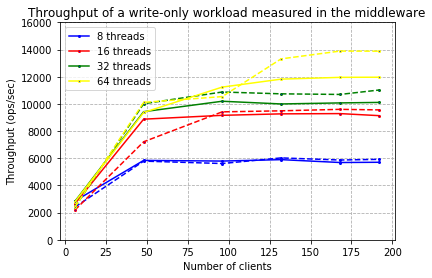

In [15]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Throughput (ops/sec)')
plt.title("Throughput of a write-only workload measured in the middleware")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_8T, = plt.plot(clients, WOthroughput_8threads_avg_M1, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_ideal_8T, = plt.plot(clients, WOideal_throughput_8threads_avg_M1, color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=2)

line_16T, = plt.plot(clients, WOthroughput_16threads_avg_M1, color='red', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_ideal_16T, = plt.plot(clients, WOideal_throughput_16threads_avg_M1, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=2)

line_32T, = plt.plot(clients, WOthroughput_32threads_avg_M1, color='green', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_ideal_32T, = plt.plot(clients, WOideal_throughput_32threads_avg_M1, color='green', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=2)

line_64T, = plt.plot(clients, WOthroughput_64threads_avg_M1, color='yellow', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_ideal_64T, = plt.plot(clients, WOideal_throughput_64threads_avg_M1, color='yellow', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=2)

#ax_lst.errorbar(clients,WOideal_throughput_8threads_avg_M1, yerr=WOideal_throughput_8threads_std_M1, fmt=None, ecolor='blue', capthick=1, capsize=4)
#ax_lst.errorbar(clients,WOideal_throughput_16threads_avg_M1, yerr=WOideal_throughput_16threads_std_M1, fmt=None, ecolor='red', capthick=1, capsize=4)
#ax_lst.errorbar(clients,WOideal_throughput_32threads_avg_M1, yerr=WOideal_throughput_32threads_std_M1, fmt=None, ecolor='green', capthick=1, capsize=4)
#ax_lst.errorbar(clients,WOideal_throughput_64threads_avg_M1, yerr=WOideal_throughput_64threads_std_M1, fmt=None, ecolor='yellow', capthick=1, capsize=4)
ax_lst.set_ylim(ymax=16000)
ax_lst.set_ylim(ymin=0)


plt.legend([ line_8T, line_16T, line_32T, line_64T ], ['8 threads','16 threads', '32 threads', '64 threads'])
plt.savefig("IdealThroughputE31WOAllThreadsMiddleware1.png", bbox_inches='tight')

In [16]:
#WOideal_throughput_8threads_avg_M1
#WOideal_throughput_16threads_avg_M1
#WOideal_throughput_32threads_avg_M1
#WOideal_throughput_64threads_avg_M1

#WOideal_throughput_8threads_std_M1
#WOideal_throughput_16threads_std_M1
#WOideal_throughput_32threads_std_M1
#WOideal_throughput_64threads_std_M1

#WOideal_latencies_8threads_avg_M1
#WOideal_latencies_16threads_avg_M1
#WOideal_latencies_32threads_avg_M1
#WOideal_latencies_64threads_avg_M1

#WOideal_latencies_8threads_std_M1
#WOideal_latencies_16threads_std_M1
#WOideal_latencies_32threads_std_M1
#WOideal_latencies_64threads_std_M1


WOthroughput_8threads_avg_M1       WOthroughput_8threads_std_M1 
WOthroughput_16threads_avg_M1      WOthroughput_16threads_std_M1
WOthroughput_32threads_avg_M1      WOthroughput_32threads_std_M1
WOthroughput_64threads_avg_M1      WOthroughput_64threads_std_M1


WOqueueLenght_8threads_avg_M1     WOqueueLenght_8threads_std_M1
WOqueueLenght_16threads_avg_M1    WOqueueLenght_16threads_std_M1
WOqueueLenght_32threads_avg_M1    WOqueueLenght_32threads_std_M1
WOqueueLenght_64threads_avg_M1    WOqueueLenght_64threads_std_M1

WOlatencies_8threads_avg_M1       WOlatencies_8threads_std_M1
WOlatencies_16threads_avg_M1      WOlatencies_16threads_std_M1
WOlatencies_32threads_avg_M1      WOlatencies_32threads_std_M1
WOlatencies_64threads_avg_M1      WOlatencies_64threads_std_M1


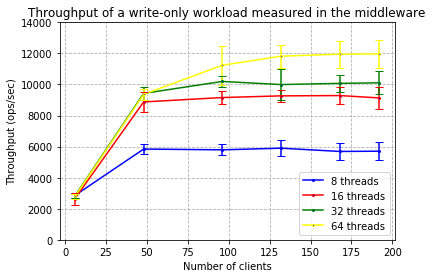

In [71]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Throughput (ops/sec)')
plt.title("Throughput of a write-only workload measured in the middleware")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_8T, = plt.plot(clients, WOthroughput_8threads_avg_M1, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_16T, = plt.plot(clients, WOthroughput_16threads_avg_M1, color='red', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_32T, = plt.plot(clients, WOthroughput_32threads_avg_M1, color='green', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_64T, = plt.plot(clients, WOthroughput_64threads_avg_M1, color='yellow', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)

ax_lst.errorbar(clients,WOthroughput_8threads_avg_M1, yerr=WOthroughput_8threads_std_M1, fmt=None, ecolor='blue', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOthroughput_16threads_avg_M1, yerr=WOthroughput_16threads_std_M1, fmt=None, ecolor='red', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOthroughput_32threads_avg_M1, yerr=WOthroughput_32threads_std_M1, fmt=None, ecolor='green', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOthroughput_64threads_avg_M1, yerr=WOthroughput_64threads_std_M1, fmt=None, ecolor='yellow', capthick=1, capsize=4)
ax_lst.set_ylim(ymax=14000)
ax_lst.set_ylim(ymin=0)

plt.legend([ line_8T, line_16T, line_32T, line_64T ], ['8 threads','16 threads', '32 threads', '64 threads'])
plt.savefig("ThroughputE31WOAllThreadsMiddleware1.png", bbox_inches='tight')

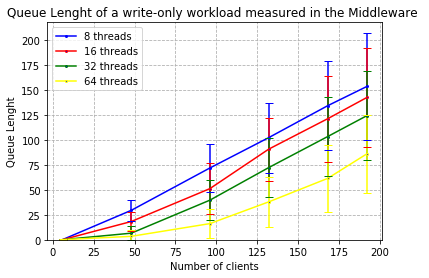

In [72]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Queue Lenght')
plt.title("Queue Lenght of a write-only workload measured in the Middleware ")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_8T, = plt.plot(clients, WOqueueLenght_8threads_avg_M1, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_16T, = plt.plot(clients, WOqueueLenght_16threads_avg_M1, color='red', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_32T, = plt.plot(clients, WOqueueLenght_32threads_avg_M1, color='green', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_64T, = plt.plot(clients, WOqueueLenght_64threads_avg_M1, color='yellow', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)

ax_lst.errorbar(clients,WOqueueLenght_8threads_avg_M1, yerr=WOqueueLenght_8threads_std_M1, fmt=None, ecolor='blue', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOqueueLenght_16threads_avg_M1, yerr=WOqueueLenght_16threads_std_M1, fmt=None, ecolor='red', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOqueueLenght_32threads_avg_M1, yerr=WOqueueLenght_32threads_std_M1, fmt=None, ecolor='green', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOqueueLenght_64threads_avg_M1, yerr=WOqueueLenght_64threads_std_M1, fmt=None, ecolor='yellow', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)

plt.legend([ line_8T, line_16T, line_32T, line_64T ], ['8 threads','16 threads', '32 threads', '64 threads'])
plt.savefig("QueueLenghtE31WOAllThreadsMiddleware1.png", bbox_inches='tight')

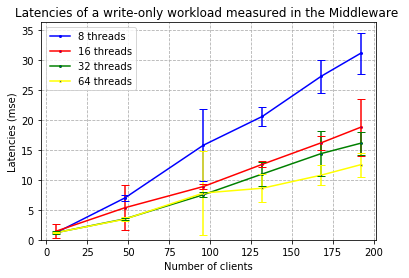

In [73]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Latencies (mse)')
plt.title("Latencies of a write-only workload measured in the Middleware ")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_8T, = plt.plot(clients, WOlatencies_8threads_avg_M1, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_16T, = plt.plot(clients, WOlatencies_16threads_avg_M1, color='red', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_32T, = plt.plot(clients, WOlatencies_32threads_avg_M1, color='green', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_64T, = plt.plot(clients, WOlatencies_64threads_avg_M1, color='yellow', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)

ax_lst.errorbar(clients,WOlatencies_8threads_avg_M1, yerr=WOlatencies_8threads_std_M1, fmt=None, ecolor='blue', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOlatencies_16threads_avg_M1, yerr=WOlatencies_16threads_std_M1, fmt=None, ecolor='red', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOlatencies_32threads_avg_M1, yerr=WOlatencies_32threads_std_M1, fmt=None, ecolor='green', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOlatencies_64threads_avg_M1, yerr=WOlatencies_64threads_std_M1, fmt=None, ecolor='yellow', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)

plt.legend([ line_8T, line_16T, line_32T, line_64T ], ['8 threads','16 threads', '32 threads', '64 threads'])
plt.savefig("LatenciesE31WOAllThreadsMiddleware1.png", bbox_inches='tight')

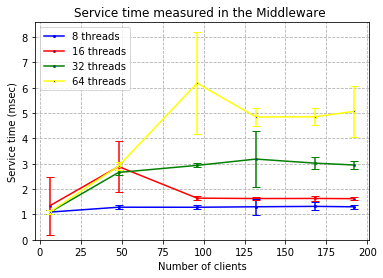

In [74]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Service time (msec)')
plt.title("Service time measured in the Middleware ")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_8T, = plt.plot(clients, WOService_time_8threads_avg_M1, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_16T, = plt.plot(clients, WOService_time_16threads_avg_M1, color='red', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_32T, = plt.plot(clients, WOService_time_32threads_avg_M1, color='green', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_64T, = plt.plot(clients, WOService_time_64threads_avg_M1, color='yellow', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)

ax_lst.errorbar(clients,WOService_time_8threads_avg_M1, yerr=WOService_time_8threads_std_M1, fmt=None, ecolor='blue', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOService_time_16threads_avg_M1, yerr=WOService_time_16threads_std_M1, fmt=None, ecolor='red', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOService_time_32threads_avg_M1, yerr=WOService_time_32threads_std_M1, fmt=None, ecolor='green', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOService_time_64threads_avg_M1, yerr=WOService_time_64threads_std_M1, fmt=None, ecolor='yellow', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)

plt.legend([ line_8T, line_16T, line_32T, line_64T ], ['8 threads','16 threads', '32 threads', '64 threads'])
plt.savefig("ServiceTimeE31WOAllThreadsMiddleware1.png", bbox_inches='tight')

In [22]:
WOService_time_16threads_std_M1[1]=1

In [23]:
WOService_time_64threads_std_M1[2]=2

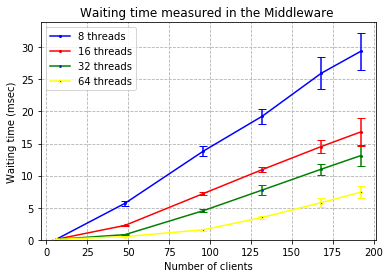

In [75]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Waiting time (msec)')
plt.title("Waiting time measured in the Middleware ")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_8T, = plt.plot(clients, WOWaiting_time_8threads_avg_M1, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_16T, = plt.plot(clients, WOWaiting_time_16threads_avg_M1, color='red', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_32T, = plt.plot(clients, WOWaiting_time_32threads_avg_M1, color='green', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_64T, = plt.plot(clients, WOWaiting_time_64threads_avg_M1, color='yellow', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)

ax_lst.errorbar(clients,WOWaiting_time_8threads_avg_M1, yerr=WOWaiting_time_8threads_std_M1, fmt=None, ecolor='blue', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOWaiting_time_16threads_avg_M1, yerr=WOWaiting_time_16threads_std_M1, fmt=None, ecolor='red', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOWaiting_time_32threads_avg_M1, yerr=WOWaiting_time_32threads_std_M1, fmt=None, ecolor='green', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOWaiting_time_64threads_avg_M1, yerr=WOWaiting_time_64threads_std_M1, fmt=None, ecolor='yellow', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)

plt.legend([ line_8T, line_16T, line_32T, line_64T ], ['8 threads','16 threads', '32 threads', '64 threads'])
plt.savefig("WaitingTimeE31WOAllThreadsMiddleware1.png", bbox_inches='tight')

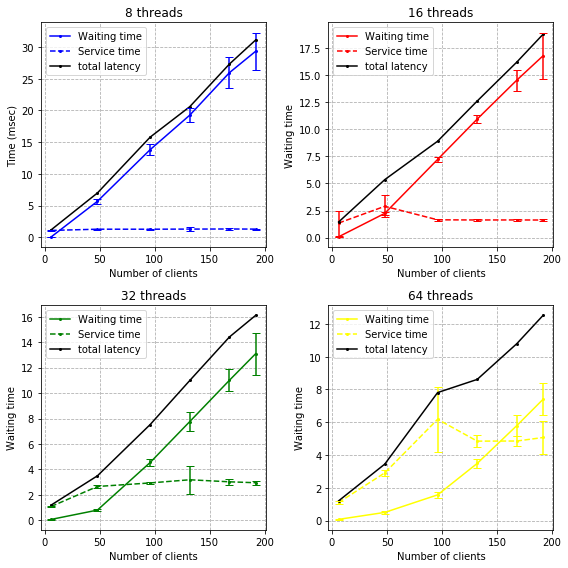

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# plot time signal:
axes[0, 0].set_title("8 threads")
t8_wait_time, = axes[0, 0].plot(clients, WOWaiting_time_8threads_avg_M1, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
t8_service_time, = axes[0, 0].plot(clients, WOService_time_8threads_avg_M1, color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=2)
t8_totLatency, = axes[0, 0].plot(clients, WOlatencies_8threads_avg_M1, color='black', linestyle='solid', marker='o',markerfacecolor='black', markersize=2)
axes[0, 0].errorbar(clients, WOWaiting_time_8threads_avg_M1, yerr=WOWaiting_time_8threads_std_M1,fmt=None, color='blue', linestyle='solid', ecolor='blue', capthick=1, capsize=4 )
axes[0, 0].errorbar(clients, WOService_time_8threads_avg_M1, yerr=WOService_time_8threads_std_M1,fmt=None, color='blue', linestyle='dashed', ecolor='blue', capthick=1, capsize=4 )
#axes[0, 0].errorbar(clients, WOlatencies_8threads_avg_M1, yerr=WOlatencies_8threads_std_M1,fmt=None, color='black', linestyle='solid',ecolor='black', capthick=1, capsize=4 )
axes[0, 0].legend([ t8_wait_time, t8_service_time, t8_totLatency ], ['Waiting time','Service time', 'total latency'])
axes[0, 0].grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
axes[0, 0].set_xlabel("Number of clients")
axes[0, 0].set_ylabel("Time (msec)")

axes[0, 1].set_title("16 threads")
t16_wait_time, = axes[0, 1].plot(clients, WOWaiting_time_16threads_avg_M1, color='red', linestyle='solid', marker='o',markerfacecolor='red', markersize=2)
t16_service_time, = axes[0, 1].plot(clients, WOService_time_16threads_avg_M1, color='red', linestyle='dashed', marker='o',markerfacecolor='red', markersize=2)
t16_totLatency, = axes[0, 1].plot(clients, WOlatencies_16threads_avg_M1, color='black', linestyle='solid', marker='o',markerfacecolor='black', markersize=2)
axes[0, 1].errorbar(clients, WOWaiting_time_16threads_avg_M1, yerr=WOWaiting_time_16threads_std_M1,fmt=None, color='red', linestyle='solid', ecolor='red', capthick=1, capsize=4 )
axes[0, 1].errorbar(clients, WOService_time_16threads_avg_M1, yerr=WOService_time_16threads_std_M1,fmt=None, color='red', linestyle='dashed', ecolor='red', capthick=1, capsize=4 )
#axes[0, 0].errorbar(clients, WOlatencies_8threads_avg_M1, yerr=WOlatencies_8threads_std_M1,fmt=None, color='black', linestyle='solid',ecolor='black', capthick=1, capsize=4 )
axes[0, 1].legend([ t16_wait_time, t16_service_time, t16_totLatency ], ['Waiting time','Service time', 'total latency'])
axes[0, 1].grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
axes[0, 1].set_xlabel("Number of clients")
axes[0, 1].set_ylabel("Waiting time")

axes[1, 0].set_title("32 threads")
t32_wait_time, = axes[1, 0].plot(clients, WOWaiting_time_32threads_avg_M1, color='green', linestyle='solid', marker='o',markerfacecolor='green', markersize=2)
t32_service_time, = axes[1, 0].plot(clients, WOService_time_32threads_avg_M1, color='green', linestyle='dashed', marker='o',markerfacecolor='green', markersize=2)
t32_totLatency, = axes[1, 0].plot(clients, WOlatencies_32threads_avg_M1, color='black', linestyle='solid', marker='o',markerfacecolor='black', markersize=2)
axes[1, 0].errorbar(clients, WOWaiting_time_32threads_avg_M1, yerr=WOWaiting_time_32threads_std_M1,fmt=None, color='green', linestyle='solid', ecolor='green', capthick=1, capsize=4 )
axes[1, 0].errorbar(clients, WOService_time_32threads_avg_M1, yerr=WOService_time_32threads_std_M1,fmt=None, color='green', linestyle='dashed', ecolor='green', capthick=1, capsize=4 )
#axes[1, 0].errorbar(clients, WOlatencies_8threads_avg_M1, yerr=WOlatencies_8threads_std_M1,fmt=None, color='black', linestyle='solid',ecolor='black', capthick=1, capsize=4 )
axes[1, 0].legend([ t32_wait_time, t32_service_time, t32_totLatency ], ['Waiting time','Service time', 'total latency'])
axes[1, 0].grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
axes[1, 0].set_xlabel("Number of clients")
axes[1, 0].set_ylabel("Waiting time")

axes[1, 1].set_title("64 threads")
t64_wait_time, = axes[1, 1].plot(clients, WOWaiting_time_64threads_avg_M1, color='yellow', linestyle='solid', marker='o',markerfacecolor='yellow', markersize=2)
t64_service_time, = axes[1, 1].plot(clients, WOService_time_64threads_avg_M1, color='yellow', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=2)
t64_totLatency, = axes[1, 1].plot(clients, WOlatencies_64threads_avg_M1, color='black', linestyle='solid', marker='o',markerfacecolor='black', markersize=2)
axes[1, 1].errorbar(clients, WOWaiting_time_64threads_avg_M1, yerr=WOWaiting_time_64threads_std_M1,fmt=None, color='yellow', linestyle='solid', ecolor='yellow', capthick=1, capsize=4 )
axes[1, 1].errorbar(clients, WOService_time_64threads_avg_M1, yerr=WOService_time_64threads_std_M1,fmt=None, color='yellow', linestyle='dashed', ecolor='yellow', capthick=1, capsize=4 )
#axes[1, 1].errorbar(clients, WOlatencies_8threads_avg_M1, yerr=WOlatencies_8threads_std_M1,fmt=None, color='black', linestyle='solid',ecolor='black', capthick=1, capsize=4 )
axes[1, 1].grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
axes[1, 1].legend([ t64_wait_time, t64_service_time, t64_totLatency ], ['Waiting time','Service time', 'total latency'])
axes[1, 1].set_xlabel("Number of clients")
axes[1, 1].set_ylabel("Waiting time")

#axes[0, 1].remove()  # don't display empty ax

fig.tight_layout()
plt.savefig("Wait&ServiceTimeE31WOAllThreadsMiddleware1.png", bbox_inches='tight')

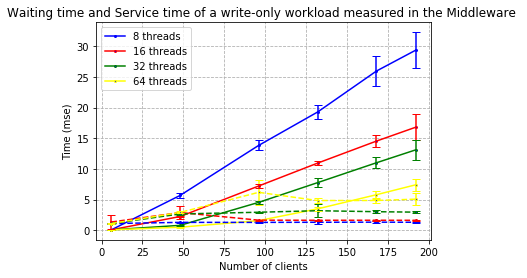

In [26]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Time (mse)')
plt.title("Waiting time and Service time of a write-only workload measured in the Middleware ")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
wait_8T, = plt.plot(clients, WOWaiting_time_8threads_avg_M1, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
wait_16T, = plt.plot(clients, WOWaiting_time_16threads_avg_M1, color='red', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
wait_32T, = plt.plot(clients, WOWaiting_time_32threads_avg_M1, color='green', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
wait_64T, = plt.plot(clients, WOWaiting_time_64threads_avg_M1, color='yellow', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)

service_8T, = plt.plot(clients, WOService_time_8threads_avg_M1, color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=2)
service_16T, = plt.plot(clients, WOService_time_16threads_avg_M1, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=2)
service_32T, = plt.plot(clients, WOService_time_32threads_avg_M1, color='green', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=2)
service_64T, = plt.plot(clients, WOService_time_64threads_avg_M1, color='yellow', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=2)

ax_lst.errorbar(clients,WOWaiting_time_8threads_avg_M1, yerr=WOWaiting_time_8threads_std_M1, fmt=None, ecolor='blue', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOWaiting_time_16threads_avg_M1, yerr=WOWaiting_time_16threads_std_M1, fmt=None, ecolor='red', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOWaiting_time_32threads_avg_M1, yerr=WOWaiting_time_32threads_std_M1, fmt=None, ecolor='green', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOWaiting_time_64threads_avg_M1, yerr=WOWaiting_time_64threads_std_M1, fmt=None, ecolor='yellow', capthick=1, capsize=4)

ax_lst.errorbar(clients,WOService_time_8threads_avg_M1, yerr=WOService_time_8threads_std_M1, fmt=None, ecolor='blue', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOService_time_16threads_avg_M1, yerr=WOService_time_16threads_std_M1, fmt=None, ecolor='red', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOService_time_32threads_avg_M1, yerr=WOService_time_32threads_std_M1, fmt=None, ecolor='green', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOService_time_64threads_avg_M1, yerr=WOService_time_64threads_std_M1, fmt=None, ecolor='yellow', capthick=1, capsize=4)

plt.legend([ wait_8T, wait_16T, wait_32T, line_64T ], ['8 threads ','16 threads', '32 threads', '64 threads'])
plt.savefig("Wait&ServiceTimeE31WOAllThreadsMiddleware1.png", bbox_inches='tight')

In [57]:
print(WOthroughput_64threads_avg_M1)
print(WOWaiting_time_64threads_avg_M1)
print(WOlatencies_64threads_avg_M1)
print(WOService_time_64threads_avg_M1)


[ 2791.57        9367.37       11236.05333333 11822.04666667
 11953.39666667 11965.09666667]
[0.0693     0.49506667 1.5657     3.48723333 5.79623333 7.41103333]
[ 1.1981      3.44626667  7.8105      8.6148     10.79733333 12.53406667]
[1.09916667 2.90823333 6.17916667 4.8461     4.8536     5.0682    ]


### For READ ONLY

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import NullFormatter  , ScalarFormatter
import matplotlib.axes as ax
import numpy as np
import statistics as st

In [28]:
MODE = 'R'
E = '3'
E_e = '3.1'
EXP = '31'

threads = 2
num_client_machines = 3
connections_per_thread = [1, 8, 16, 22, 28, 32]

clients = []

for c in connections_per_thread:
    clients.append(c*threads*num_client_machines)
clients

path_8threads_M1 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_'+str(E)+'/'+str(E_e)+'/'+str(MODE)+'_only/Middleware1/8_threads/'
path_16threads_M1 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_'+str(E)+'/'+str(E_e)+'/'+str(MODE)+'_only/Middleware1/16_threads/'
path_32threads_M1 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_'+str(E)+'/'+str(E_e)+'/'+str(MODE)+'_only/Middleware1/32_threads/'
path_64threads_M1 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_'+str(E)+'/'+str(E_e)+'/'+str(MODE)+'_only/Middleware1/64_threads/'



In [29]:
## This puts in the map every measure for different number of connection_per_thread and every try.

#Throughput
ROthroughput_8threads_avg_M1 = {1:[], 2:[], 3:[]}
ROthroughput_8threads_std_M1 = {1:[], 2:[], 3:[]}

ROthroughput_16threads_avg_M1 = {1:[], 2:[], 3:[]}
ROthroughput_16threads_std_M1 = {1:[], 2:[], 3:[]}

ROthroughput_32threads_avg_M1 = {1:[], 2:[], 3:[]}
ROthroughput_32threads_std_M1 = {1:[], 2:[], 3:[]}

ROthroughput_64threads_avg_M1 = {1:[], 2:[], 3:[]}
ROthroughput_64threads_std_M1 = {1:[], 2:[], 3:[]}

#Reading throughput measurements.
# THROUGHPUT_E31ROMidd1_T8_try1 THROUGHPUT_E31ROMidd1_T8_try2 THROUGHPUT_E31ROMidd1_T8_try3
# THROUGHPUT_E31ROMidd1_T16_try1 THROUGHPUT_E3ROMidd1_T16_try2 THROUGHPUT_E31ROMidd1_T16_try3
# THROUGHPUT_E31ROMidd1_T32_try1 THROUGHPUT_E31ROMidd1_T32_try2 THROUGHPUT_E31ROMidd1_T32_try3
# THROUGHPUT_E31ROMidd1_T64_try1 THROUGHPUT_E31ROMidd1_T64_try2 THROUGHPUT_E31ROMidd1_T64_try3

for n_try in [1, 2, 3]:
    filename_8threads = str(path_8threads_M1)+'THROUGHPUT_E'+str(EXP)+str(MODE)+'OMidd1_T8_try'+str(n_try)
    filename_16threads = str(path_16threads_M1)+'THROUGHPUT_E'+str(EXP)+str(MODE)+'OMidd1_T16_try'+str(n_try)
    filename_32threads = str(path_32threads_M1)+'THROUGHPUT_E'+str(EXP)+str(MODE)+'OMidd1_T32_try'+str(n_try)
    filename_64threads = str(path_64threads_M1)+'THROUGHPUT_E'+str(EXP)+str(MODE)+'OMidd1_T64_try'+str(n_try)

    filename_8threads = open(filename_8threads, "r")
    filename_16threads = open(filename_16threads, "r")
    filename_32threads = open(filename_32threads, "r")
    filename_64threads = open(filename_64threads, "r")

    for line in filename_8threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROthroughput_8threads_avg_M1.get(n_try).append(float(avg))
            ROthroughput_8threads_std_M1.get(n_try).append(float(std))

    for line in filename_16threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROthroughput_16threads_avg_M1.get(n_try).append(float(avg))
            ROthroughput_16threads_std_M1.get(n_try).append(float(std))

    for line in filename_32threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROthroughput_32threads_avg_M1.get(n_try).append(float(avg))
            ROthroughput_32threads_std_M1.get(n_try).append(float(std))

    for line in filename_64threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROthroughput_64threads_avg_M1.get(n_try).append(float(avg))
            ROthroughput_64threads_std_M1.get(n_try).append(float(std))


In [30]:

# Put data of queueLenght in corresponding Maps.

#Queue Lenght
ROqueueLenght_8threads_avg_M1 = {1:[], 2:[], 3:[]}
ROqueueLenght_8threads_std_M1 = {1:[], 2:[], 3:[]}

ROqueueLenght_16threads_avg_M1 = {1:[], 2:[], 3:[]}
ROqueueLenght_16threads_std_M1 = {1:[], 2:[], 3:[]}

ROqueueLenght_32threads_avg_M1 = {1:[], 2:[], 3:[]}
ROqueueLenght_32threads_std_M1 = {1:[], 2:[], 3:[]}

ROqueueLenght_64threads_avg_M1 = {1:[], 2:[], 3:[]}
ROqueueLenght_64threads_std_M1 = {1:[], 2:[], 3:[]}


# QueueLength_E31ROMidd1_T8_try1 QueueLength_E31ROMidd1_T8_try2 QueueLength_E31ROMidd1_T8_try3
# QueueLength_E31ROMidd1_T16_try1 QueueLength_E31ROMidd1_T16_try2 QueueLength_E31ROMidd1_T16_try3
# QueueLength_E31ROMidd1_T32_try1 QueueLength_E31ROMidd1_T32_try2 QueueLength_E31ROMidd1_T32_try3
# QueueLength_E31ROMidd1_T64_try1 QueueLength_E31ROMidd1_T64_try2 QueueLength_E31ROMidd1_T64_try3
for n_try in [1, 2, 3]:
    filename_8threads = str(path_8threads_M1)+'QueueLength_E'+str(EXP)+str(MODE)+'OMidd1_T8_try'+str(n_try)
    filename_16threads = str(path_16threads_M1)+'QueueLength_E'+str(EXP)+str(MODE)+'OMidd1_T16_try'+str(n_try)
    filename_32threads = str(path_32threads_M1)+'QueueLength_E'+str(EXP)+str(MODE)+'OMidd1_T32_try'+str(n_try)
    filename_64threads = str(path_64threads_M1)+'QueueLength_E'+str(EXP)+str(MODE)+'OMidd1_T64_try'+str(n_try)

    filename_8threads = open(filename_8threads, "r")
    filename_16threads = open(filename_16threads, "r")
    filename_32threads = open(filename_32threads, "r")
    filename_64threads = open(filename_64threads, "r")

    for line in filename_8threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROqueueLenght_8threads_avg_M1.get(n_try).append(float(avg))
            ROqueueLenght_8threads_std_M1.get(n_try).append(float(std))

        
    for line in filename_16threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROqueueLenght_16threads_avg_M1.get(n_try).append(float(avg))
            ROqueueLenght_16threads_std_M1.get(n_try).append(float(std))

    for line in filename_32threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROqueueLenght_32threads_avg_M1.get(n_try).append(float(avg))
            ROqueueLenght_32threads_std_M1.get(n_try).append(float(std))

    for line in filename_64threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROqueueLenght_64threads_avg_M1.get(n_try).append(float(avg))
            ROqueueLenght_64threads_std_M1.get(n_try).append(float(std))

        
# Put data of Waiting Time in corresponding Maps.

#Waiting Time
ROWaitingTime_8threads_avg_M1 = {1:[], 2:[], 3:[]}
ROWaitingTime_8threads_std_M1 = {1:[], 2:[], 3:[]}

ROWaitingTime_16threads_avg_M1 = {1:[], 2:[], 3:[]}
ROWaitingTime_16threads_std_M1 = {1:[], 2:[], 3:[]}

ROWaitingTime_32threads_avg_M1 = {1:[], 2:[], 3:[]}
ROWaitingTime_32threads_std_M1 = {1:[], 2:[], 3:[]}

ROWaitingTime_64threads_avg_M1 = {1:[], 2:[], 3:[]}
ROWaitingTime_64threads_std_M1 = {1:[], 2:[], 3:[]}


# WaitingTime_E31ROMidd1_T8_try1 WaitingTime_E31ROMidd1_T8_try2 WaitingTime_E31ROMidd1_T8_try3
# WaitingTime_E31ROMidd1_T16_try1 WaitingTime_E31ROMidd1_T16_try2 WaitingTime_E31ROMidd1_T16_try3
# WaitingTime_E31ROMidd1_T32_try1 WaitingTime_E31ROMidd1_T32_try2 WaitingTime_E31ROMidd1_T32_try3
# WaitingTime_E31ROMidd1_T64_try1 WaitingTime_E31ROMidd1_T64_try2 WaitingTime_E31ROMidd1_T64_try3

for n_try in [1, 2, 3]:
    filename_8threads = str(path_8threads_M1)+'WaitingTime_E'+str(EXP)+str(MODE)+'OMidd1_T8_try'+str(n_try)
    filename_16threads = str(path_16threads_M1)+'WaitingTime_E'+str(EXP)+str(MODE)+'OMidd1_T16_try'+str(n_try)
    filename_32threads = str(path_32threads_M1)+'WaitingTime_E'+str(EXP)+str(MODE)+'OMidd1_T32_try'+str(n_try)
    filename_64threads = str(path_64threads_M1)+'WaitingTime_E'+str(EXP)+str(MODE)+'OMidd1_T64_try'+str(n_try)

    filename_8threads = open(filename_8threads, "r")
    filename_16threads = open(filename_16threads, "r")
    filename_32threads = open(filename_32threads, "r")
    filename_64threads = open(filename_64threads, "r")

    for line in filename_8threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROWaitingTime_8threads_avg_M1.get(n_try).append(float(avg))
            ROWaitingTime_8threads_std_M1.get(n_try).append(float(std))

        
    for line in filename_16threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROWaitingTime_16threads_avg_M1.get(n_try).append(float(avg))
            ROWaitingTime_16threads_std_M1.get(n_try).append(float(std))

    for line in filename_32threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROWaitingTime_32threads_avg_M1.get(n_try).append(float(avg))
            ROWaitingTime_32threads_std_M1.get(n_try).append(float(std))

    for line in filename_64threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROWaitingTime_64threads_avg_M1.get(n_try).append(float(avg))
            ROWaitingTime_64threads_std_M1.get(n_try).append(float(std))
            
# Put data of Service Time in corresponding Maps.

#Service Time

ROServiceTime_8threads_avg_M1 = {1:[], 2:[], 3:[]}
ROServiceTime_8threads_std_M1 = {1:[], 2:[], 3:[]}

ROServiceTime_16threads_avg_M1 = {1:[], 2:[], 3:[]}
ROServiceTime_16threads_std_M1 = {1:[], 2:[], 3:[]}

ROServiceTime_32threads_avg_M1 = {1:[], 2:[], 3:[]}
ROServiceTime_32threads_std_M1 = {1:[], 2:[], 3:[]}

ROServiceTime_64threads_avg_M1 = {1:[], 2:[], 3:[]}
ROServiceTime_64threads_std_M1 = {1:[], 2:[], 3:[]}

# ServiceTime_E31ROMidd1_T8_try1 ServiceTime_E31ROMidd1_T8_try2 ServiceTime_E31ROMidd1_T8_try3
# ServiceTime_E31ROMidd1_T16_try1 ServiceTime_E31ROMidd1_T16_try2 ServiceTime_E31ROMidd1_T16_try3
# ServiceTime_E31ROMidd1_T32_try1 ServiceTime_E31ROMidd1_T32_try2 ServiceTime_E31ROMidd1_T32_try3
# ServiceTime_E31ROMidd1_T64_try1 ServiceTime_E31ROMidd1_T64_try2 ServiceTime_E31ROMidd1_T64_try3

for n_try in [1, 2, 3]:
    filename_8threads = str(path_8threads_M1)+'ServiceTime_E'+str(EXP)+str(MODE)+'OMidd1_T8_try'+str(n_try)
    filename_16threads = str(path_16threads_M1)+'ServiceTime_E'+str(EXP)+str(MODE)+'OMidd1_T16_try'+str(n_try)
    filename_32threads = str(path_32threads_M1)+'ServiceTime_E'+str(EXP)+str(MODE)+'OMidd1_T32_try'+str(n_try)
    filename_64threads = str(path_64threads_M1)+'ServiceTime_E'+str(EXP)+str(MODE)+'OMidd1_T64_try'+str(n_try)

    filename_8threads = open(filename_8threads, "r")
    filename_16threads = open(filename_16threads, "r")
    filename_32threads = open(filename_32threads, "r")
    filename_64threads = open(filename_64threads, "r")

    for line in filename_8threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROServiceTime_8threads_avg_M1.get(n_try).append(float(avg))
            ROServiceTime_8threads_std_M1.get(n_try).append(float(std))

        
    for line in filename_16threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROServiceTime_16threads_avg_M1.get(n_try).append(float(avg))
            ROServiceTime_16threads_std_M1.get(n_try).append(float(std))

    for line in filename_32threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROServiceTime_32threads_avg_M1.get(n_try).append(float(avg))
            ROServiceTime_32threads_std_M1.get(n_try).append(float(std))

    for line in filename_64threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROServiceTime_64threads_avg_M1.get(n_try).append(float(avg))
            ROServiceTime_64threads_std_M1.get(n_try).append(float(std))
            
            
#Parse Time
ROParseTime_8threads_avg_M1 = {1:[], 2:[], 3:[]}
ROParseTime_8threads_std_M1 = {1:[], 2:[], 3:[]}

ROParseTime_16threads_avg_M1 = {1:[], 2:[], 3:[]}
ROParseTime_16threads_std_M1 = {1:[], 2:[], 3:[]}

ROParseTime_32threads_avg_M1 = {1:[], 2:[], 3:[]}
ROParseTime_32threads_std_M1 = {1:[], 2:[], 3:[]}

ROParseTime_64threads_avg_M1 = {1:[], 2:[], 3:[]}
ROParseTime_64threads_std_M1 = {1:[], 2:[], 3:[]}

# ParseTime_E31ROMidd1_T8_try1 ParseTime_E31ROMidd1_T8_try2 ParseTime_E31ROMidd1_T8_try3
# ParseTime_E31ROMidd1_T16_try1 ParseTime_E31ROMidd1_T16_try2 ParseTime_E31ROMidd1_T16_try3
# ParseTime_E31ROMidd1_T32_try1 ParseTime_E31ROMidd1_T32_try2 ParseTime_E31ROMidd1_T32_try3
# ParseTime_E31ROMidd1_T64_try1 ParseTime_E31ROMidd1_T64_try2 ParseTime_E31ROMidd1_T64_try3

for n_try in [1, 2, 3]:
    filename_8threads = str(path_8threads_M1)+'ParseTime_E'+str(EXP)+str(MODE)+'OMidd1_T8_try'+str(n_try)
    filename_16threads = str(path_16threads_M1)+'ParseTime_E'+str(EXP)+str(MODE)+'OMidd1_T16_try'+str(n_try)
    filename_32threads = str(path_32threads_M1)+'ParseTime_E'+str(EXP)+str(MODE)+'OMidd1_T32_try'+str(n_try)
    filename_64threads = str(path_64threads_M1)+'ParseTime_E'+str(EXP)+str(MODE)+'OMidd1_T64_try'+str(n_try)

    filename_8threads = open(filename_8threads, "r")
    filename_16threads = open(filename_16threads, "r")
    filename_32threads = open(filename_32threads, "r")
    filename_64threads = open(filename_64threads, "r")

    for line in filename_8threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROParseTime_8threads_avg_M1.get(n_try).append(float(avg))
            ROParseTime_8threads_std_M1.get(n_try).append(float(std))

        
    for line in filename_16threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROParseTime_16threads_avg_M1.get(n_try).append(float(avg))
            ROParseTime_16threads_std_M1.get(n_try).append(float(std))

    for line in filename_32threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROParseTime_32threads_avg_M1.get(n_try).append(float(avg))
            ROParseTime_32threads_std_M1.get(n_try).append(float(std))

    for line in filename_64threads:
        if(len(line.split())!=0):
            avg = line.split()[1][5: (5+int(len(line.split()[1][5:]))-1)]
            std = line.split()[2][5: (5+int(len(line.split()[1][5:]))-1)]
            ROParseTime_64threads_avg_M1.get(n_try).append(float(avg))
            ROParseTime_64threads_std_M1.get(n_try).append(float(std))

            


In [31]:

#Now calculate the following

ROlatencies_8threads_avg_M1 = {1:[], 2:[], 3:[]}
ROlatencies_8threads_std_M1 = {1:[], 2:[], 3:[]}

ROlatencies_16threads_avg_M1 = {1:[], 2:[], 3:[]}
ROlatencies_16threads_std_M1 = {1:[], 2:[], 3:[]}

ROlatencies_32threads_avg_M1 = {1:[], 2:[], 3:[]}
ROlatencies_32threads_std_M1 = {1:[], 2:[], 3:[]}

ROlatencies_64threads_avg_M1 = {1:[], 2:[], 3:[]}
ROlatencies_64threads_std_M1 = {1:[], 2:[], 3:[]}

for n_try in [1, 2, 3]:
    for i in range(0,len(ROParseTime_8threads_avg_M1.get(n_try)),1):
        ROlatencies_8threads_avg_M1.get(n_try).append(    ROParseTime_8threads_avg_M1.get(n_try)[i] + 
                                                          ROWaitingTime_8threads_avg_M1.get(n_try)[i] +
                                                          ROServiceTime_8threads_avg_M1.get(n_try)[i]
                                                     )
        ROlatencies_8threads_std_M1.get(n_try).append(    ROParseTime_8threads_std_M1.get(n_try)[i] + 
                                                          ROWaitingTime_8threads_std_M1.get(n_try)[i] +
                                                          ROServiceTime_8threads_std_M1.get(n_try)[i]
                                                     )
    for i in range(0,len(ROParseTime_16threads_avg_M1.get(n_try)),1):       
        ROlatencies_16threads_avg_M1.get(n_try).append(   ROParseTime_16threads_avg_M1.get(n_try)[i] + 
                                                          ROWaitingTime_16threads_avg_M1.get(n_try)[i] +
                                                          ROServiceTime_16threads_avg_M1.get(n_try)[i]
                                                     )
        
        ROlatencies_16threads_std_M1.get(n_try).append(   ROParseTime_16threads_std_M1.get(n_try)[i] + 
                                                          ROWaitingTime_16threads_std_M1.get(n_try)[i] +
                                                          ROServiceTime_16threads_std_M1.get(n_try)[i]
                                                     )
    for i in range(0,len(ROParseTime_32threads_avg_M1.get(1)),1):               
        ROlatencies_32threads_avg_M1.get(n_try).append(   ROParseTime_32threads_avg_M1.get(n_try)[i] + 
                                                          ROWaitingTime_32threads_avg_M1.get(n_try)[i] +
                                                          ROServiceTime_32threads_avg_M1.get(n_try)[i]
                                                     )
        
        ROlatencies_32threads_std_M1.get(n_try).append(   ROParseTime_32threads_std_M1.get(n_try)[i] + 
                                                          ROWaitingTime_32threads_std_M1.get(n_try)[i] +
                                                          ROServiceTime_32threads_std_M1.get(n_try)[i]
                                                     )

    for i in range(0,len(ROParseTime_64threads_avg_M1.get(1)),1):               
        ROlatencies_64threads_avg_M1.get(n_try).append(   ROParseTime_64threads_avg_M1.get(n_try)[i] + 
                                                          ROWaitingTime_64threads_avg_M1.get(n_try)[i] +
                                                          ROServiceTime_64threads_avg_M1.get(n_try)[i]
                                                     )
        
        ROlatencies_64threads_std_M1.get(n_try).append(   ROParseTime_64threads_std_M1.get(n_try)[i] + 
                                                          ROWaitingTime_64threads_std_M1.get(n_try)[i] +
                                                          ROServiceTime_64threads_std_M1.get(n_try)[i]
                                                     )
        
        
ROlatencies_8threads_avg_M1 = np.mean([ ROlatencies_8threads_avg_M1.get(1), ROlatencies_8threads_avg_M1.get(2), ROlatencies_8threads_avg_M1.get(3) ], axis=0)
ROlatencies_8threads_std_M1 = np.mean([ ROlatencies_8threads_std_M1.get(1), ROlatencies_8threads_std_M1.get(2), ROlatencies_8threads_std_M1.get(3) ], axis=0)

ROlatencies_16threads_avg_M1 = np.mean([ ROlatencies_16threads_avg_M1.get(1), ROlatencies_16threads_avg_M1.get(2), ROlatencies_16threads_avg_M1.get(3) ], axis=0)
ROlatencies_16threads_std_M1 = np.mean([ ROlatencies_16threads_std_M1.get(1), ROlatencies_16threads_std_M1.get(2), ROlatencies_16threads_std_M1.get(3) ], axis=0)

ROlatencies_32threads_avg_M1 = np.mean([ ROlatencies_32threads_avg_M1.get(1), ROlatencies_32threads_avg_M1.get(2), ROlatencies_32threads_avg_M1.get(3) ], axis=0)
ROlatencies_32threads_std_M1 = np.mean([ ROlatencies_32threads_std_M1.get(1), ROlatencies_32threads_std_M1.get(2), ROlatencies_32threads_std_M1.get(3) ], axis=0)

ROlatencies_64threads_avg_M1 = np.mean([ ROlatencies_64threads_avg_M1.get(1), ROlatencies_64threads_avg_M1.get(2), ROlatencies_64threads_avg_M1.get(3) ], axis=0)
ROlatencies_64threads_std_M1 = np.mean([ ROlatencies_64threads_std_M1.get(1), ROlatencies_64threads_std_M1.get(2), ROlatencies_64threads_std_M1.get(3) ], axis=0)


In [32]:
ROthroughput_8threads_avg_M1 = np.mean([ ROthroughput_8threads_avg_M1.get(1), ROthroughput_8threads_avg_M1.get(2), ROthroughput_8threads_avg_M1.get(3) ], axis=0)
ROthroughput_8threads_std_M1 = np.mean([ ROthroughput_8threads_std_M1.get(1), ROthroughput_8threads_std_M1.get(2), ROthroughput_8threads_std_M1.get(3) ], axis=0)

ROthroughput_16threads_avg_M1 = np.mean([ ROthroughput_16threads_avg_M1.get(1), ROthroughput_16threads_avg_M1.get(2), ROthroughput_16threads_avg_M1.get(3) ], axis=0)
ROthroughput_16threads_std_M1 = np.mean([ ROthroughput_16threads_std_M1.get(1), ROthroughput_16threads_std_M1.get(2), ROthroughput_16threads_std_M1.get(3) ], axis=0)

ROthroughput_32threads_avg_M1 = np.mean([ ROthroughput_32threads_avg_M1.get(1), ROthroughput_32threads_avg_M1.get(2), ROthroughput_32threads_avg_M1.get(3) ], axis=0)
ROthroughput_32threads_std_M1 = np.mean([ ROthroughput_32threads_std_M1.get(1), ROthroughput_32threads_std_M1.get(2), ROthroughput_32threads_std_M1.get(3) ], axis=0)

ROthroughput_64threads_avg_M1 = np.mean([ ROthroughput_64threads_avg_M1.get(1), ROthroughput_64threads_avg_M1.get(2), ROthroughput_64threads_avg_M1.get(3) ], axis=0)
ROthroughput_64threads_std_M1 = np.mean([ ROthroughput_64threads_std_M1.get(1), ROthroughput_64threads_std_M1.get(2), ROthroughput_64threads_std_M1.get(3) ], axis=0)

ROqueueLenght_8threads_avg_M1 = np.mean([ ROqueueLenght_8threads_avg_M1.get(1), ROqueueLenght_8threads_avg_M1.get(2), ROqueueLenght_8threads_avg_M1.get(3) ], axis=0)
ROqueueLenght_8threads_std_M1 = np.mean([ ROqueueLenght_8threads_std_M1.get(1), ROqueueLenght_8threads_std_M1.get(2), ROqueueLenght_8threads_std_M1.get(3) ], axis=0)

ROqueueLenght_16threads_avg_M1 = np.mean([ ROqueueLenght_16threads_avg_M1.get(1), ROqueueLenght_16threads_avg_M1.get(2), ROqueueLenght_16threads_avg_M1.get(3) ], axis=0)
ROqueueLenght_16threads_std_M1 = np.mean([ ROqueueLenght_16threads_std_M1.get(1), ROqueueLenght_16threads_std_M1.get(2), ROqueueLenght_16threads_std_M1.get(3) ], axis=0)

ROqueueLenght_32threads_avg_M1 = np.mean([ ROqueueLenght_32threads_avg_M1.get(1), ROqueueLenght_32threads_avg_M1.get(2), ROqueueLenght_32threads_avg_M1.get(3) ], axis=0)
ROqueueLenght_32threads_std_M1 = np.mean([ ROqueueLenght_32threads_std_M1.get(1), ROqueueLenght_32threads_std_M1.get(2), ROqueueLenght_32threads_std_M1.get(3) ], axis=0)

ROqueueLenght_64threads_avg_M1 = np.mean([ ROqueueLenght_64threads_avg_M1.get(1), ROqueueLenght_64threads_avg_M1.get(2), ROqueueLenght_64threads_avg_M1.get(3) ], axis=0)
ROqueueLenght_64threads_std_M1 = np.mean([ ROqueueLenght_64threads_std_M1.get(1), ROqueueLenght_64threads_std_M1.get(2), ROqueueLenght_64threads_std_M1.get(3) ], axis=0)


In [33]:
ROService_time_8threads_avg_M1 = np.mean([ ROServiceTime_8threads_avg_M1.get(1),ROServiceTime_8threads_avg_M1.get(2),ROServiceTime_8threads_avg_M1.get(3) ], axis=0)
ROService_time_8threads_std_M1 = np.mean([ ROServiceTime_8threads_std_M1.get(1),ROServiceTime_8threads_std_M1.get(2),ROServiceTime_8threads_std_M1.get(3) ], axis=0)

ROService_time_16threads_avg_M1 = np.mean([ ROServiceTime_16threads_avg_M1.get(1),ROServiceTime_16threads_avg_M1.get(2),ROServiceTime_16threads_avg_M1.get(3) ], axis=0)
ROService_time_16threads_std_M1 = np.mean([ ROServiceTime_16threads_std_M1.get(1),ROServiceTime_16threads_std_M1.get(2),ROServiceTime_16threads_std_M1.get(3) ], axis=0)

ROService_time_32threads_avg_M1 = np.mean([ ROServiceTime_32threads_avg_M1.get(1),ROServiceTime_32threads_avg_M1.get(2),ROServiceTime_32threads_avg_M1.get(3) ], axis=0)
ROService_time_32threads_std_M1 = np.mean([ ROServiceTime_32threads_std_M1.get(1),ROServiceTime_32threads_std_M1.get(2),ROServiceTime_32threads_std_M1.get(3) ], axis=0)

ROService_time_64threads_avg_M1 = np.mean([ ROServiceTime_64threads_avg_M1.get(1),ROServiceTime_64threads_avg_M1.get(2),ROServiceTime_64threads_avg_M1.get(3) ], axis=0)
ROService_time_64threads_std_M1 = np.mean([ ROServiceTime_64threads_std_M1.get(1),ROServiceTime_64threads_std_M1.get(2),ROServiceTime_64threads_std_M1.get(3) ], axis=0)

ROWaiting_time_8threads_avg_M1 = np.mean([ ROWaitingTime_8threads_avg_M1.get(1),ROWaitingTime_8threads_avg_M1.get(2),ROWaitingTime_8threads_avg_M1.get(3) ], axis=0)
ROWaiting_time_8threads_std_M1 = np.mean([ ROWaitingTime_8threads_std_M1.get(1),ROWaitingTime_8threads_std_M1.get(2),ROWaitingTime_8threads_std_M1.get(3) ], axis=0)

ROWaiting_time_16threads_avg_M1 = np.mean([ ROWaitingTime_16threads_avg_M1.get(1),ROWaitingTime_16threads_avg_M1.get(2),ROWaitingTime_16threads_avg_M1.get(3) ], axis=0)
ROWaiting_time_16threads_std_M1 = np.mean([ ROWaitingTime_16threads_std_M1.get(1),ROWaitingTime_16threads_std_M1.get(2),ROWaitingTime_16threads_std_M1.get(3) ], axis=0)

ROWaiting_time_32threads_avg_M1 = np.mean([ ROWaitingTime_32threads_avg_M1.get(1),ROWaitingTime_32threads_avg_M1.get(2),ROWaitingTime_32threads_avg_M1.get(3) ], axis=0)
ROWaiting_time_32threads_std_M1 = np.mean([ ROWaitingTime_32threads_std_M1.get(1),ROWaitingTime_32threads_std_M1.get(2),ROWaitingTime_32threads_std_M1.get(3) ], axis=0)

ROWaiting_time_64threads_avg_M1 = np.mean([ ROWaitingTime_64threads_avg_M1.get(1),ROWaitingTime_64threads_avg_M1.get(2),ROWaitingTime_64threads_avg_M1.get(3) ], axis=0)
ROWaiting_time_64threads_std_M1 = np.mean([ ROWaitingTime_64threads_std_M1.get(1),ROWaitingTime_64threads_std_M1.get(2),ROWaitingTime_64threads_std_M1.get(3) ], axis=0)


In [34]:
print(ROWaitingTime_8threads_avg_M1.get(1))
print(ROServiceTime_8threads_avg_M1.get(1))
print(ROlatencies_8threads_avg_M1)

[0.0824, 12.2167, 28.1497, 40.2569, 50.71, 58.3553]
[1.0556, 2.4606, 2.4675, 2.4789, 2.4707, 2.4433]
[ 1.19173333 14.8638     30.8604     42.94763333 53.3721     61.6423    ]


In [35]:
print(ROWaitingTime_16threads_avg_M1.get(1))
print(ROServiceTime_16threads_avg_M1.get(1))
print(ROlatencies_16threads_avg_M1)

[0.0837, 9.3353, 25.1778, 37.2323, 49.207, 55.2275]
[1.0973, 5.0504, 5.0534, 5.077, 5.0646, 5.0154]
[ 1.22536667 14.63346667 30.58973333 42.60573333 54.35686667 60.59866667]


In [36]:
print(ROWaitingTime_32threads_avg_M1.get(1))
print(ROServiceTime_32threads_avg_M1.get(1))
print(ROlatencies_32threads_avg_M1)

[0.088, 4.3502, 19.6468, 31.3408, 42.1437, 49.932]
[1.0574, 9.8026, 10.4082, 10.3935, 10.1516, 10.1431]
[ 1.20103333 14.50303333 30.3861     42.132      53.1539     60.34936667]


In [37]:
print(ROWaitingTime_64threads_avg_M1.get(1))
print(ROServiceTime_64threads_avg_M1.get(1))
print(ROlatencies_64threads_avg_M1)

[0.0787, 0.7026, 9.055, 20.3163, 32.1711, 38.7826]
[1.0814, 13.376, 20.7987, 20.9548, 21.0779, 20.3228]
[ 1.23623333 14.4819     30.40896667 41.80133333 52.7769     60.13026667]


In [64]:
#To calculate.

ROideal_throughput_8threads_avg_M1 = {1:[], 2:[], 3:[]}
ROideal_throughput_8threads_std_M1 = {1:[], 2:[], 3:[]}

ROideal_throughput_16threads_avg_M1 = {1:[], 2:[], 3:[]}
ROideal_throughput_16threads_std_M1 = {1:[], 2:[], 3:[]}

ROideal_throughput_32threads_avg_M1 = {1:[], 2:[], 3:[]}
ROideal_throughput_32threads_std_M1 = {1:[], 2:[], 3:[]}

ROideal_throughput_64threads_avg_M1 = {1:[], 2:[], 3:[]}
ROideal_throughput_64threads_std_M1 = {1:[], 2:[], 3:[]}



ROideal_latencies_8threads_avg_M1 = {1:[], 2:[], 3:[]}
ROideal_latencies_8threads_std_M1 = {1:[], 2:[], 3:[]}

ROideal_latencies_16threads_avg_M1 = {1:[], 2:[], 3:[]}
ROideal_latencies_16threads_std_M1 = {1:[], 2:[], 3:[]}

ROideal_latencies_32threads_avg_M1 = {1:[], 2:[], 3:[]}
ROideal_latencies_32threads_std_M1 = {1:[], 2:[], 3:[]}

ROideal_latencies_64threads_avg_M1 = {1:[], 2:[], 3:[]}
ROideal_latencies_64threads_std_M1 = {1:[], 2:[], 3:[]}


for i in range(0,len(WOthroughput_8threads_avg_M1),1):
    ROideal_throughput_8threads_avg_M1[i] = (1/(ROlatencies_8threads_avg_M1[i]/1000))*(clients[i])
    ROideal_throughput_16threads_avg_M1[i] = (1/(ROlatencies_16threads_avg_M1[i]/1000))*(clients[i])
    ROideal_throughput_32threads_avg_M1[i] = (1/(ROlatencies_32threads_avg_M1[i]/1000))*(clients[i])
    ROideal_throughput_64threads_avg_M1[i] = (1/(ROlatencies_64threads_avg_M1[i]/1000))*(clients[i])

    ROideal_throughput_8threads_std_M1[i] = (1/(ROlatencies_8threads_std_M1[i]/1000))*(clients[i])
    ROideal_throughput_16threads_std_M1[i] = (1/(ROlatencies_16threads_std_M1[i]/1000))*(clients[i])
    ROideal_throughput_32threads_std_M1[i] = (1/(ROlatencies_32threads_std_M1[i]/1000))*(clients[i])
    ROideal_throughput_64threads_std_M1[i] = (1/(ROlatencies_64threads_std_M1[i]/1000))*(clients[i])

    
    ROideal_latencies_8threads_avg_M1[i] = 1000*(1/ROthroughput_8threads_avg_M1[i])*(clients[i])
    ROideal_latencies_16threads_avg_M1[i] = 1000*(1/ROthroughput_16threads_avg_M1[i])*(clients[i])
    ROideal_latencies_32threads_avg_M1[i] = 1000*(1/ROthroughput_32threads_avg_M1[i])*(clients[i])
    ROideal_latencies_64threads_avg_M1[i] = 1000*(1/ROthroughput_64threads_avg_M1[i])*(clients[i])
   

    ROideal_latencies_8threads_std_M1[i] = 1000*(1/ROthroughput_8threads_std_M1[i])*(clients[i])
    ROideal_latencies_16threads_std_M1[i] = 1000*(1/ROthroughput_16threads_std_M1[i])*(clients[i])
    ROideal_latencies_32threads_std_M1[i] = 1000*(1/ROthroughput_32threads_std_M1[i])*(clients[i])
    ROideal_latencies_64threads_std_M1[i] = 1000*(1/ROthroughput_64threads_std_M1[i])*(clients[i])
  

ROthroughput_8threads_avg_M1       ROthroughput_8threads_std_M1 
ROthroughput_16threads_avg_M1      ROthroughput_16threads_std_M1
ROthroughput_32threads_avg_M1      ROthroughput_32threads_std_M1
ROthroughput_64threads_avg_M1      ROthroughput_64threads_std_M1


ROqueueLenght_8threads_avg_M1     ROqueueLenght_8threads_std_M1
ROqueueLenght_16threads_avg_M1    ROqueueLenght_16threads_std_M1
ROqueueLenght_32threads_avg_M1    ROqueueLenght_32threads_std_M1
ROqueueLenght_64threads_avg_M1    ROqueueLenght_64threads_std_M1

ROlatencies_8threads_avg_M1       ROlatencies_8threads_std_M1
ROlatencies_16threads_avg_M1      ROlatencies_16threads_std_M1
ROlatencies_32threads_avg_M1      ROlatencies_32threads_std_M1
ROlatencies_64threads_avg_M1      ROlatencies_64threads_std_M1


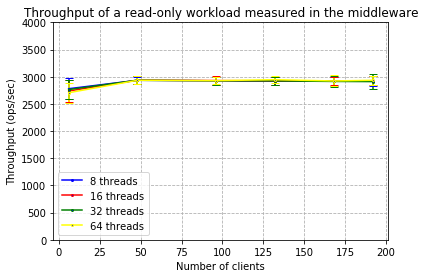

In [39]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Throughput (ops/sec)')
plt.title("Throughput of a read-only workload measured in the middleware")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_8T, = plt.plot(clients, ROthroughput_8threads_avg_M1, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_16T, = plt.plot(clients, ROthroughput_16threads_avg_M1, color='red', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_32T, = plt.plot(clients, ROthroughput_32threads_avg_M1, color='green', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_64T, = plt.plot(clients, ROthroughput_64threads_avg_M1, color='yellow', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)

ax_lst.errorbar(clients,ROthroughput_8threads_avg_M1, yerr=ROthroughput_8threads_std_M1, fmt=None, ecolor='blue', capthick=1, capsize=4)
ax_lst.errorbar(clients,ROthroughput_16threads_avg_M1, yerr=ROthroughput_16threads_std_M1, fmt=None, ecolor='red', capthick=1, capsize=4)
ax_lst.errorbar(clients,ROthroughput_32threads_avg_M1, yerr=ROthroughput_32threads_std_M1, fmt=None, ecolor='green', capthick=1, capsize=4)
ax_lst.errorbar(clients,ROthroughput_64threads_avg_M1, yerr=ROthroughput_64threads_std_M1, fmt=None, ecolor='yellow', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)
ax_lst.set_ylim(ymax=4000)


plt.legend([ line_8T, line_16T, line_32T, line_64T ], ['8 threads','16 threads', '32 threads', '64 threads'])
plt.savefig("ThroughputE31ROAllThreadsMiddleware1.png", bbox_inches='tight')

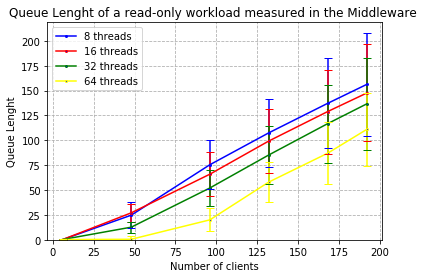

In [76]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Queue Lenght')
plt.title("Queue Lenght of a read-only workload measured in the Middleware ")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_8T, = plt.plot(clients, ROqueueLenght_8threads_avg_M1, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_16T, = plt.plot(clients, ROqueueLenght_16threads_avg_M1, color='red', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_32T, = plt.plot(clients, ROqueueLenght_32threads_avg_M1, color='green', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_64T, = plt.plot(clients, ROqueueLenght_64threads_avg_M1, color='yellow', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)

ax_lst.errorbar(clients,ROqueueLenght_8threads_avg_M1, yerr=ROqueueLenght_8threads_std_M1, fmt=None, ecolor='blue', capthick=1, capsize=4)
ax_lst.errorbar(clients,ROqueueLenght_16threads_avg_M1, yerr=ROqueueLenght_16threads_std_M1, fmt=None, ecolor='red', capthick=1, capsize=4)
ax_lst.errorbar(clients,ROqueueLenght_32threads_avg_M1, yerr=ROqueueLenght_32threads_std_M1, fmt=None, ecolor='green', capthick=1, capsize=4)
ax_lst.errorbar(clients,ROqueueLenght_64threads_avg_M1, yerr=ROqueueLenght_64threads_std_M1, fmt=None, ecolor='yellow', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)

plt.legend([ line_8T, line_16T, line_32T, line_64T ], ['8 threads','16 threads', '32 threads', '64 threads'])
plt.savefig("QueueLenghtE31ROAllThreadsMiddleware1.png", bbox_inches='tight')

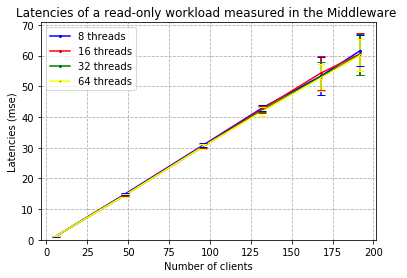

In [77]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Latencies (mse)')
plt.title("Latencies of a read-only workload measured in the Middleware ")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_8T, = plt.plot(clients, ROlatencies_8threads_avg_M1, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_16T, = plt.plot(clients, ROlatencies_16threads_avg_M1, color='red', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_32T, = plt.plot(clients, ROlatencies_32threads_avg_M1, color='green', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_64T, = plt.plot(clients, ROlatencies_64threads_avg_M1, color='yellow', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)

ax_lst.errorbar(clients,ROlatencies_8threads_avg_M1, yerr=ROlatencies_8threads_std_M1, fmt=None, ecolor='blue', capthick=1, capsize=4)
ax_lst.errorbar(clients,ROlatencies_16threads_avg_M1, yerr=ROlatencies_16threads_std_M1, fmt=None, ecolor='red', capthick=1, capsize=4)
ax_lst.errorbar(clients,ROlatencies_32threads_avg_M1, yerr=ROlatencies_32threads_std_M1, fmt=None, ecolor='green', capthick=1, capsize=4)
ax_lst.errorbar(clients,ROlatencies_64threads_avg_M1, yerr=ROlatencies_64threads_std_M1, fmt=None, ecolor='yellow', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)

plt.legend([ line_8T, line_16T, line_32T, line_64T ], ['8 threads','16 threads', '32 threads', '64 threads'])
plt.savefig("LatenciesE31ROAllThreadsMiddleware1.png", bbox_inches='tight')

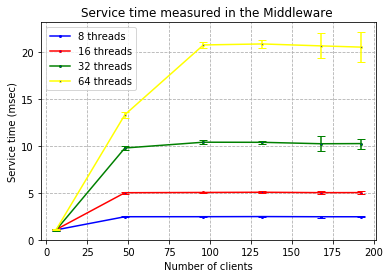

In [78]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Service time (msec)')
plt.title("Service time measured in the Middleware ")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_8T, = plt.plot(clients, ROService_time_8threads_avg_M1, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_16T, = plt.plot(clients, ROService_time_16threads_avg_M1, color='red', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_32T, = plt.plot(clients, ROService_time_32threads_avg_M1, color='green', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_64T, = plt.plot(clients, ROService_time_64threads_avg_M1, color='yellow', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)

ax_lst.errorbar(clients,ROService_time_8threads_avg_M1, yerr=ROService_time_8threads_std_M1, fmt=None, ecolor='blue', capthick=1, capsize=4)
ax_lst.errorbar(clients,ROService_time_16threads_avg_M1, yerr=ROService_time_16threads_std_M1, fmt=None, ecolor='red', capthick=1, capsize=4)
ax_lst.errorbar(clients,ROService_time_32threads_avg_M1, yerr=ROService_time_32threads_std_M1, fmt=None, ecolor='green', capthick=1, capsize=4)
ax_lst.errorbar(clients,ROService_time_64threads_avg_M1, yerr=ROService_time_64threads_std_M1, fmt=None, ecolor='yellow', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)

plt.legend([ line_8T, line_16T, line_32T, line_64T ], ['8 threads','16 threads', '32 threads', '64 threads'])
plt.savefig("ServiceTimeE31ROAllThreadsMiddleware1.png", bbox_inches='tight')

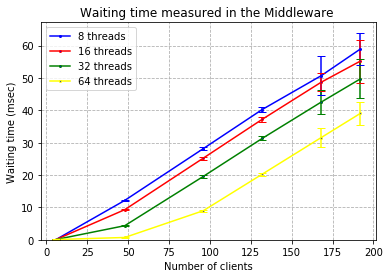

In [79]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Waiting time (msec)')
plt.title("Waiting time measured in the Middleware ")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_8T, = plt.plot(clients, ROWaiting_time_8threads_avg_M1, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_16T, = plt.plot(clients, ROWaiting_time_16threads_avg_M1, color='red', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_32T, = plt.plot(clients, ROWaiting_time_32threads_avg_M1, color='green', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_64T, = plt.plot(clients, ROWaiting_time_64threads_avg_M1, color='yellow', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)

ax_lst.errorbar(clients,ROWaiting_time_8threads_avg_M1, yerr=ROWaiting_time_8threads_std_M1, fmt=None, ecolor='blue', capthick=1, capsize=4)
ax_lst.errorbar(clients,ROWaiting_time_16threads_avg_M1, yerr=ROWaiting_time_16threads_std_M1, fmt=None, ecolor='red', capthick=1, capsize=4)
ax_lst.errorbar(clients,ROWaiting_time_32threads_avg_M1, yerr=ROWaiting_time_32threads_std_M1, fmt=None, ecolor='green', capthick=1, capsize=4)
ax_lst.errorbar(clients,ROWaiting_time_64threads_avg_M1, yerr=ROWaiting_time_64threads_std_M1, fmt=None, ecolor='yellow', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)

plt.legend([ line_8T, line_16T, line_32T, line_64T ], ['8 threads','16 threads', '32 threads', '64 threads'])
plt.savefig("WaitingTimeE31ROAllThreadsMiddleware1.png", bbox_inches='tight')

In [55]:
print(WOthroughput_64threads_avg_M1)
print(WOWaiting_time_64threads_avg_M1)
print(WOlatencies_64threads_avg_M1)

[ 2791.57        9367.37       11236.05333333 11822.04666667
 11953.39666667 11965.09666667]
[0.0693     0.49506667 1.5657     3.48723333 5.79623333 7.41103333]
[ 1.1981      3.44626667  7.8105      8.6148     10.79733333 12.53406667]


In [54]:
print(ROthroughput_64threads_avg_M1)
print(ROWaiting_time_64threads_avg_M1)
print(ROlatencies_64threads_avg_M1)

[2705.26666667 2934.10333333 2927.30333333 2945.09333333 2922.13666667
 2934.77666667]
[ 0.08513333  0.7196      8.99416667 20.27953333 31.57733333 39.07153333]
[ 1.23623333 14.4819     30.40896667 41.80133333 52.7769     60.13026667]


In [70]:
print(ROthroughput_64threads_avg_M1)
print(ROideal_throughput_64threads_avg_M1)

[2705.26666667 2934.10333333 2927.30333333 2945.09333333 2922.13666667
 2934.77666667]
{0: 4853.452692318064, 1: 3314.482215731361, 2: 3156.963571051959, 3: 3157.794009760455, 4: 3183.2108365591776, 5: 3193.0674956815983}
